# Polynomial Regression & Regularization

In [1]:
import numpy as np

import matplotlib.pyplot as plt 
import operator
from matplotlib.pyplot import figure

import pandas as pd  
import seaborn as sns 

%matplotlib inline

from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import time

boston_dataset = load_boston()

In [2]:
print(boston_dataset.keys())
print(type(boston_dataset))

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
<class 'sklearn.utils.Bunch'>


* **data** : contains the information for various houses
* **target** : prices of the house
* **feature_names** : names of the features
* **DESCR** : describes the dataset

## Dataset

In [3]:
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### Features labels

In [4]:
features = boston_dataset.feature_names
print(features)
print(len(features))

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
13


### Target values

In [5]:
target = boston_dataset.target
target_name = 'MEDV'
print(target)
print('\n')
print("The Target name is : {}".format(target_name))

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

### Create the Pandas Dataframe

In [6]:
boston = pd.DataFrame(boston_dataset.data, columns = features)
print(boston.shape)

boston.head()

(506, 13)


CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33

### Add the target variable to the Dataframe

In [7]:
boston[target_name] = target

boston.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2

### Check for NaN values

In [8]:
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

## Plot the 'Pearson' Correlation Matrix

$$\large \rho_{X,Y} = \frac{\sum_{i} (x_{i} - \mu_{X})(y_{i}-\mu_{Y})}{\sqrt{\sum_{j}(x_{j}-\mu_{X})^2 \sum_{k} (y_{k}-\mu_{Y})^2}}$$

$$\large -1 \le \rho_{X,Y} \le 1$$

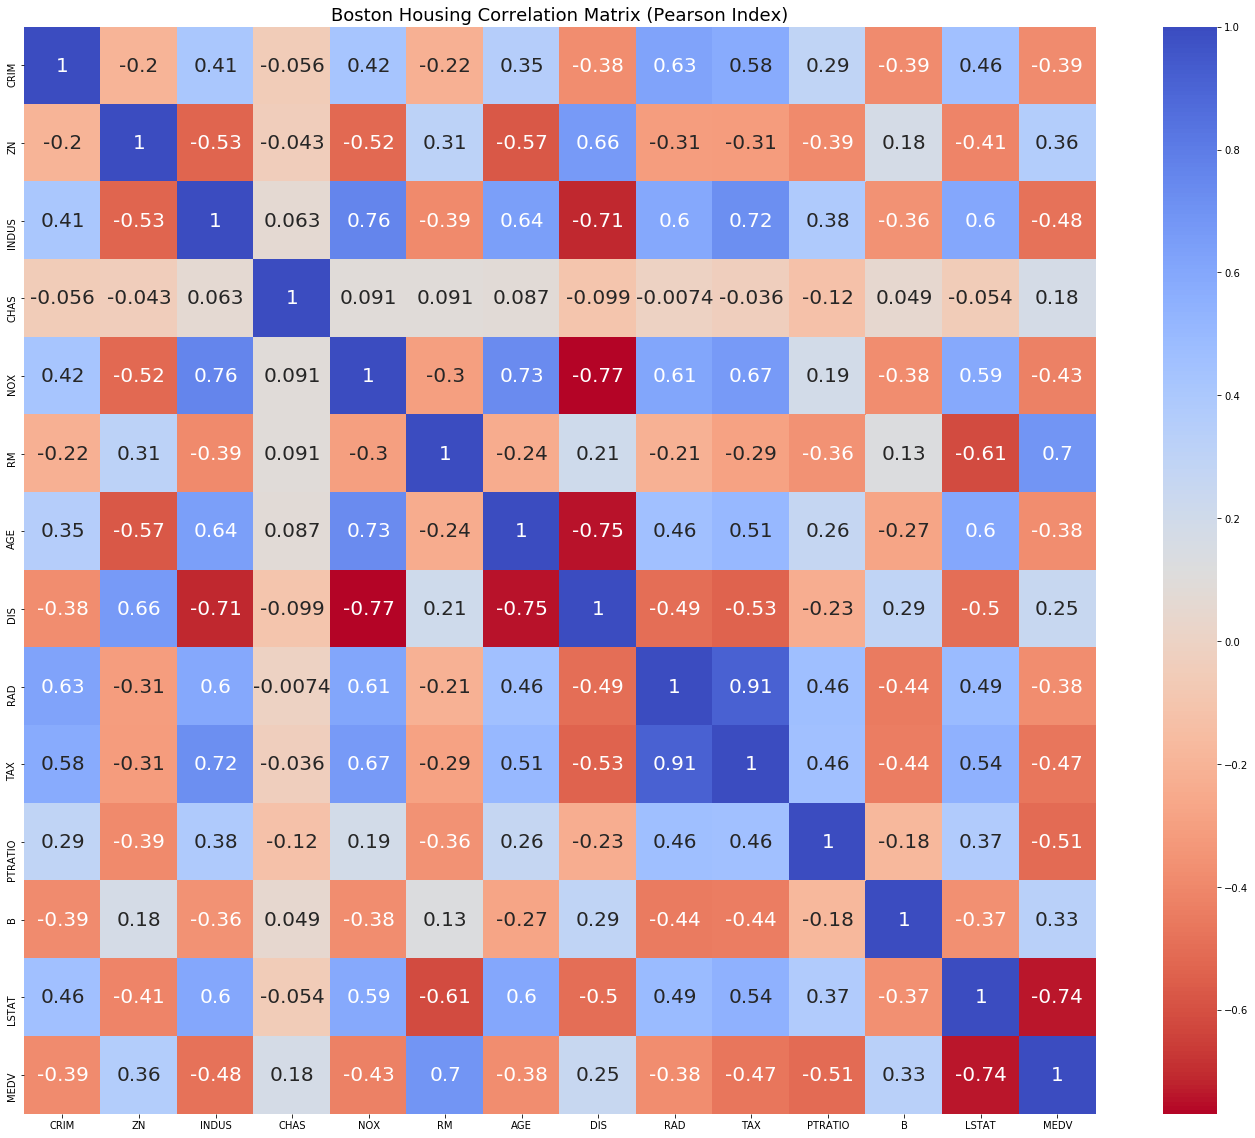

In [9]:
f, (ax1) = plt.subplots(1, 1, figsize=(24,20))
correlation_matrix = boston.corr(method='pearson')
sns.heatmap(correlation_matrix, cmap='coolwarm_r', annot = True, annot_kws={'size':20}, ax=ax1)
ax1.set_title("Boston Housing Correlation Matrix (Pearson Index)", fontsize=18)
plt.show()

### Scatter Plot of LSTAT and RM

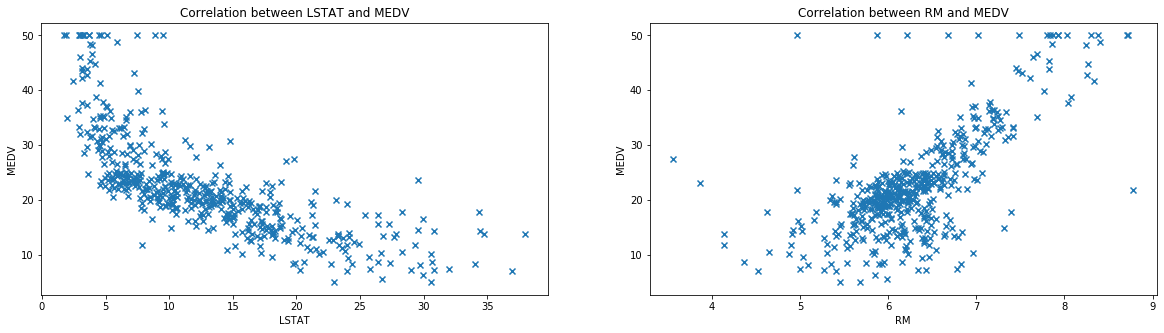

In [10]:
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM']

for i, col in enumerate(features):
    plt.subplot(1, len(features), i+1)
    x = boston[col]
    y = target
    plt.scatter(x, y, marker='x')
    plt.title("Correlation between {} and {}".format(col, target_name))
    plt.xlabel(col)
    plt.ylabel('MEDV')

# Linear Regression with RM

$$\large h_{\theta}(x) = \theta_0 + \theta_1 x$$

In [11]:
variable = 'RM'

X = np.c_[np.ones((boston.shape[0],1)), boston[variable]]
y = np.array(boston[target_name]).reshape(-1,1)

In [12]:
print(X.shape, y.shape)

(506, 2) (506, 1)


### Normal Equation (Custom)

In [13]:
def normalEquations(X, y):
    start = time.time()
    #theta = np.dot(np.dot(np.linalg.pinv(np.dot(np.transpose(X), X)), np.transpose(X)), y)
    pinv = np.linalg.pinv(X.T.dot(X))
    theta_ne = pinv.dot(X.T).dot(y)
    end = time.time()
    eta_ne = end-start
    return theta_ne.ravel(), eta_ne

### Linear Regression Model (Sklearn)

In [14]:
def LR(X, y):
    start = time.time()
    regr = LinearRegression()
    regr.fit(X,y)
    end = time.time()
    eta_lr = end - start
    return regr, eta_lr

## Fit the Linear Regression model

In [15]:
theta_ne, _ = normalEquations(X, y)
regr, _ = LR(X, y)


In [16]:
print(theta_ne)
print(regr.intercept_, regr.coef_)


[-34.67062078   9.10210898]
[-34.67062078] [[0.         9.10210898]]


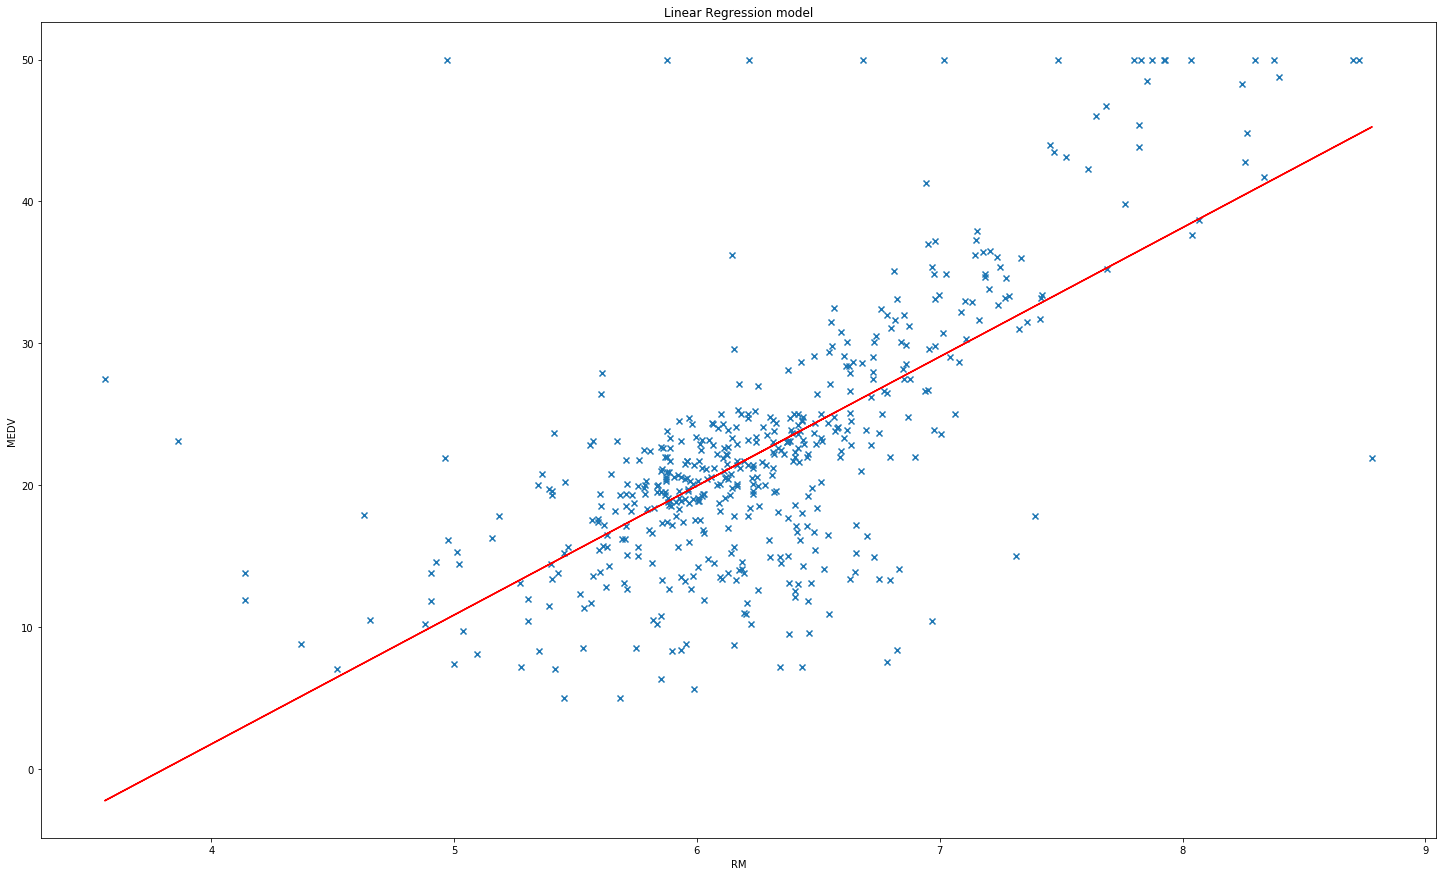

In [17]:
plt.figure(figsize = (25,15))
plt.scatter(X[:,1], y, marker='x')
plt.plot(X[:,1], X.dot(theta_ne), c = 'r')
plt.title("Linear Regression model")
plt.xlabel(variable)
plt.ylabel(target_name)
plt.show()

## Create Polynomial features

* The **polynomial_features()** function accepts a dataframe
* You have to convert the input $X$ that is a numpy array to a Pandas DataFrame

In [18]:
def polynomial_features(dataframe, degree):
    dataframe = dataframe.copy()
    variable = dataframe.columns
    for i in range(1, degree):  
        colname = variable + '**%d'%(i+1)
        dataframe[colname] = dataframe[variable]**(i+1)
    return dataframe


### Back to Pandas DataFrame (select only the RM column)

In [19]:
X_poly = pd.DataFrame(X[:,1], columns = [variable])
print(X_poly)

        RM
0    6.575
1    6.421
2    7.185
3    6.998
4    7.147
..     ...
501  6.593
502  6.120
503  6.976
504  6.794
505  6.030

[506 rows x 1 columns]


In [20]:
X_poly.head()


RM
0  6.575
1  6.421
2  7.185
3  6.998
4  7.147

## Compare polynomial input with degree greater than 2 until 5 (Sklear)

Value of theta for degree 1: 
[-34.67062078   9.10210898]
Weight matrix for degree 1: 
[[1.    6.575]
 [1.    6.421]
 [1.    7.185]
 ...
 [1.    6.976]
 [1.    6.794]
 [1.    6.03 ]]

Value of theta for degree 1: 
[[0.         9.10210898]]

Intercept for degree 1: 
[-34.67062078]
Weight matrix for degree 2: 
[[ 1.        6.575    43.230625]
 [ 1.        6.421    41.229241]
 [ 1.        7.185    51.624225]
 ...
 [ 1.        6.976    48.664576]
 [ 1.        6.794    46.158436]
 [ 1.        6.03     36.3609  ]]

Value of theta for degree 2: 
[[  0.         -22.64326237   2.47012384]]

Intercept for degree 2: 
[66.05884748]
Weight matrix for degree 3: 
[[  1.           6.575       43.230625   284.24135938]
 [  1.           6.421       41.229241   264.73295646]
 [  1.           7.185       51.624225   370.92005662]
 ...
 [  1.           6.976       48.664576   339.48408218]
 [  1.           6.794       46.158436   313.60041418]
 [  1.           6.03        36.3609     219.256227  ]]

Value 

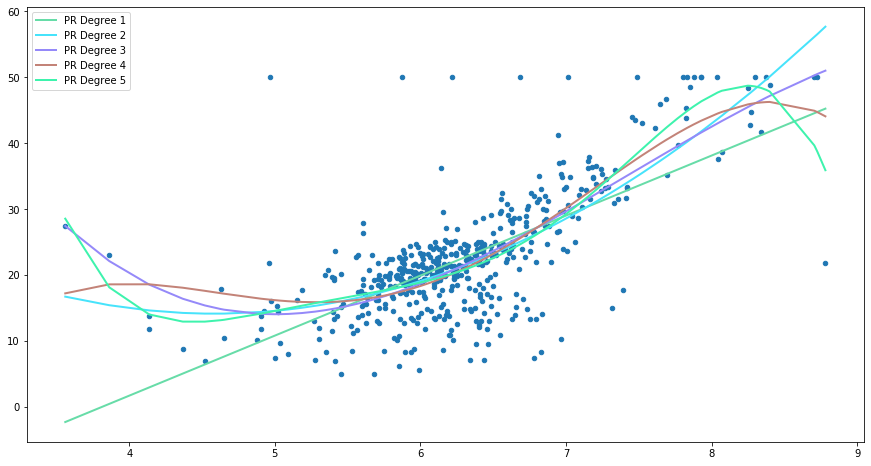

In [21]:
from sklearn.preprocessing import PolynomialFeatures 

#Degree 1
print("Value of theta for degree 1: ")
print(theta_ne)

degree = 5

plt.figure(figsize = (15,8))
plt.scatter(X_poly['RM'].to_numpy(), y, s=20)

for i in range(1,degree+1):
    polynomial_features_2= PolynomialFeatures(degree=i)
    x_poly_2 = polynomial_features_2.fit_transform(X_poly['RM'].to_numpy().reshape(-1,1))
    model2 = LinearRegression()
    model2.fit(x_poly_2, y)
    y_poly_pred_2 = model2.predict(x_poly_2)
    print("Weight matrix for degree {}: ".format(i))
    print(x_poly_2)
    print("")
    print("Value of theta for degree {}: ".format(i))
    print(model2.coef_)
    print("")
    print("Intercept for degree {}: ".format(i))
    print(model2.intercept_)
    sort_axis = operator.itemgetter(0)
    sorted_zip = sorted(zip(X_poly['RM'].to_numpy().reshape(-1,1),y_poly_pred_2), key=sort_axis)
    x2, y_poly_pred_2 = zip(*sorted_zip)
    plt.plot(x2, y_poly_pred_2, color=np.random.rand(3,), label="PR Degree "+str(i), linewidth=2)
    plt.legend(loc="upper left")
plt.show()

## Compare polynomial input with degree greater than 2 until 5 (Normal Equation)

* Add again the column of ones for the intercept parameter

[-34.67062078   9.10210898]
[-34.67062078   9.10210898]
[ 66.05884748 -22.64326237   2.47012384]
[ 241.31081479 -109.3906069    16.49101636   -0.74039373]
[-463.48184499  371.45613767 -103.65840762   12.3214722    -0.52208953]
[-36.19850877 -27.88481144  41.20427713 -13.25277567   1.68060066
  -0.07419179]


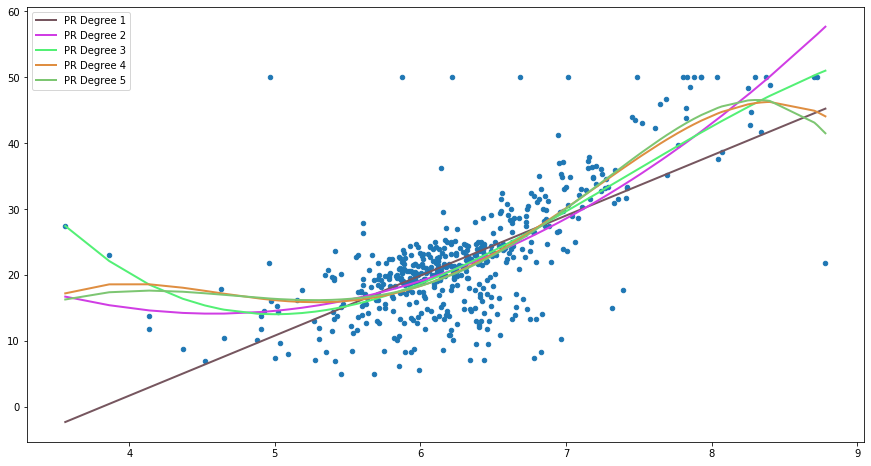

In [22]:
degree = 5

print(theta_ne)
plt.figure(figsize = (15,8))
plt.scatter(X[:,1], y, s=20)

for i in range(1,degree+1):
    X_poly_2 = np.c_[np.ones((X_poly.shape[0], 1)), polynomial_features(X_poly.copy(), i)]
    theta_ne_2, eta_ne_2 = normalEquations(X_poly_2, y)
    print(theta_ne_2)
    sort_axis = operator.itemgetter(0)
    sorted_zip = sorted(zip(X_poly['RM'].to_numpy().reshape(-1,1),X_poly_2.dot(theta_ne_2)), key=sort_axis)
    x2, y_poly_pred_2 = zip(*sorted_zip)
    plt.plot(x2, y_poly_pred_2, color=np.random.rand(3,), label="PR Degree "+str(i), linewidth=2)
    plt.legend(loc="upper left")
plt.show()

### Outliers Analysis & Removal

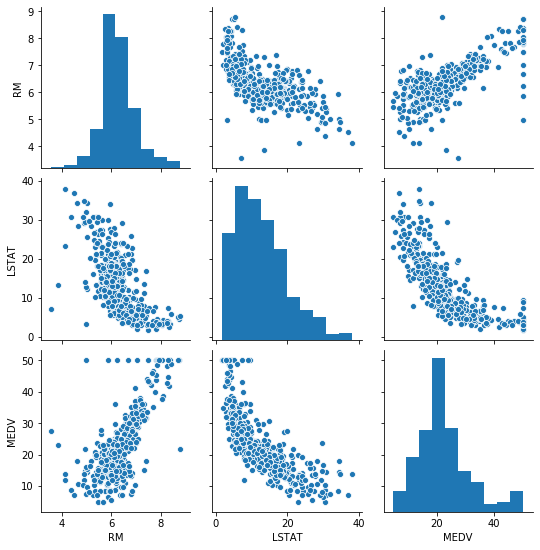

In [23]:
#Mostriamo la correlazione delle proprietà maggiormente correlate
cols = ["RM","LSTAT","MEDV"]
sns.pairplot(boston[cols])

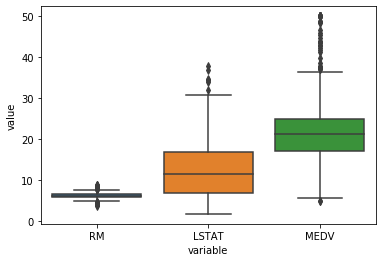

In [24]:
#Boxplot for features with high correlation
data = {'RM':  boston['RM'],
        'LSTAT':  boston['LSTAT'],
        'MEDV':  boston['MEDV'],
        }
df = pd.DataFrame (data, columns = ['RM','LSTAT','MEDV'])
sns.boxplot(x="variable", y="value", data=pd.melt(df))

### View Outliers method IQR

In [25]:
X_input_tmp = df
print(X_input_tmp)

        RM  LSTAT  MEDV
0    6.575   4.98  24.0
1    6.421   9.14  21.6
2    7.185   4.03  34.7
3    6.998   2.94  33.4
4    7.147   5.33  36.2
..     ...    ...   ...
501  6.593   9.67  22.4
502  6.120   9.08  20.6
503  6.976   5.64  23.9
504  6.794   6.48  22.0
505  6.030   7.88  11.9

[506 rows x 3 columns]


In [26]:
Q1 = X_input_tmp.quantile(0.25)
Q2 = X_input_tmp.quantile(0.5)
Q3 = X_input_tmp.quantile(0.75)

IQR = Q3 - Q1
lower_range = Q1 - (1.5 * IQR)
upper_range = Q3 + (1.5 * IQR)

lowerboundRM = lower_range['RM']
upperboundRM = upper_range['RM']
print("The extremes for RM are {} / {}".format(lowerboundRM, upperboundRM))

lowerboundMEDV = lower_range['MEDV']
upperboundMEDV = upper_range['MEDV']
print("The extremes for MEDV are {} / {}".format(lowerboundMEDV, upperboundMEDV))

lowerboundLSTAT = lower_range['LSTAT']
upperboundLSTAT = upper_range['LSTAT']
print("The extremes for LSTAT are {} / {}".format(lowerboundLSTAT, upperboundLSTAT))

The extremes for RM are 4.778500000000001 / 7.730499999999999
The extremes for MEDV are 5.0624999999999964 / 36.962500000000006
The extremes for LSTAT are -8.057500000000005 / 31.962500000000006


In [27]:
boston_q1 = X_input_tmp[~(X_input_tmp < (Q1 - 1.5 * IQR))]
print("Detect samples below the lower threshold")
print(boston_q1.isnull().sum())

print("")

boston_q2 = X_input_tmp[~(X_input_tmp > (Q3 + 1.5 * IQR))]
print("Detect samples above the upper threshold")
print(boston_q2.isnull().sum())

Detect samples below the lower threshold
RM       8
LSTAT    0
MEDV     2
dtype: int64

Detect samples above the upper threshold
RM       22
LSTAT     7
MEDV     38
dtype: int64


### Plot Removing RM Outliers

In [28]:
#Eseguo il conteggio degli outliers e dei non outliers
boston_iqr = X_input_tmp[~((X_input_tmp < lowerboundRM) | (X_input_tmp > upperboundRM))['RM'] == True]
print("Number RM of non-outliers samples (IQR method) : {}".format(boston_iqr.shape[0]))

outliers_iqr = X_input_tmp[((X_input_tmp < lowerboundRM) | (X_input_tmp > upperboundRM))['RM'] == True]
print("Number RM outliers samples (IQR method) : {}".format(outliers_iqr.shape[0]))

Number RM of non-outliers samples (IQR method) : 476
Number RM outliers samples (IQR method) : 30


In [29]:
#Visualizzo gli indici per cui gli outliers sono presenti - valori più bassi del threshold minimo
X_input_tmp.RM[X_input_tmp[~(X_input_tmp < lowerboundRM)].isnull()['RM'] == True]
#Visualizzo gli indici per cui gli outliers sono presenti - valori più alti del threshold massimo
X_input_tmp.RM[X_input_tmp[~(X_input_tmp > upperboundRM)].isnull()['RM'] == True]

97     8.069
98     7.820
162    7.802
163    8.375
166    7.929
180    7.765
186    7.831
195    7.875
203    7.853
204    8.034
224    8.266
225    8.725
226    8.040
232    8.337
233    8.247
253    8.259
257    8.704
262    8.398
267    8.297
280    7.820
283    7.923
364    8.780
Name: RM, dtype: float64

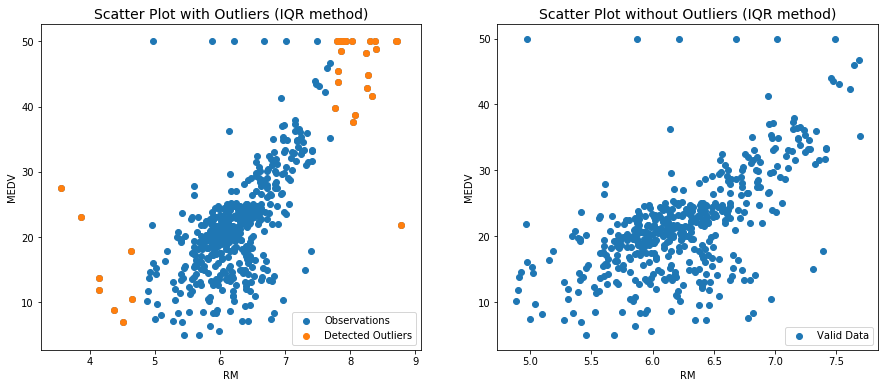

In [30]:
fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

input_feature = 'RM'
output_feature = 'MEDV'

ax1.scatter(X_input_tmp[input_feature], X_input_tmp[output_feature], label = 'Observations')
ax1.scatter(outliers_iqr[input_feature], outliers_iqr[output_feature], label='Detected Outliers')
ax1.set_xlabel(input_feature)
ax1.set_ylabel(output_feature)
ax1.set_title('Scatter Plot with Outliers (IQR method)', fontsize=14)
ax1.legend()

ax2.scatter(boston_iqr[input_feature], boston_iqr[output_feature], label = 'Valid Data')
ax2.set_xlabel(input_feature)
ax2.set_ylabel(output_feature)
ax2.set_title('Scatter Plot without Outliers (IQR method)', fontsize=14)
ax2.legend()

plt.show()

### +Compare polynomial input without RM Outliers with degree greater than 2 until 5 (Sklear)

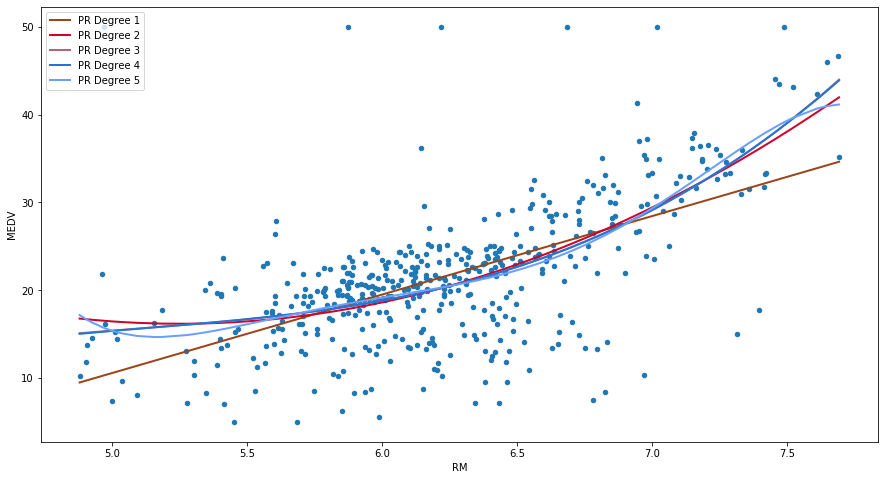

In [31]:
clearedDf = X_input_tmp.drop(outliers_iqr.index)

degree = 5

plt.figure(figsize = (15,8))
plt.scatter(clearedDf[input_feature].to_numpy().reshape(-1,1), clearedDf[output_feature].to_numpy().reshape(-1,1), s=20)

for i in range(1,degree+1):
    polynomial_features_2= PolynomialFeatures(degree=i)
    x_poly_2 = polynomial_features_2.fit_transform(clearedDf[input_feature].to_numpy().reshape(-1,1))
    model2 = LinearRegression()
    model2.fit(x_poly_2, clearedDf[output_feature].to_numpy().reshape(-1,1))
    y_poly_pred_2 = model2.predict(x_poly_2)
    sort_axis = operator.itemgetter(0)
    sorted_zip = sorted(zip(clearedDf[input_feature].to_numpy().reshape(-1,1),y_poly_pred_2), key=sort_axis)
    x2, y_poly_pred_2 = zip(*sorted_zip)
    plt.plot(x2, y_poly_pred_2, color=np.random.rand(3,), label="PR Degree "+str(i), linewidth=2)
    plt.xlabel(input_feature)
    plt.ylabel(output_feature)
    plt.legend(loc="upper left")
plt.show()

### +Compare polynomial input without RM Outliers with degree greater than 2 until 5 (Normal Equation)

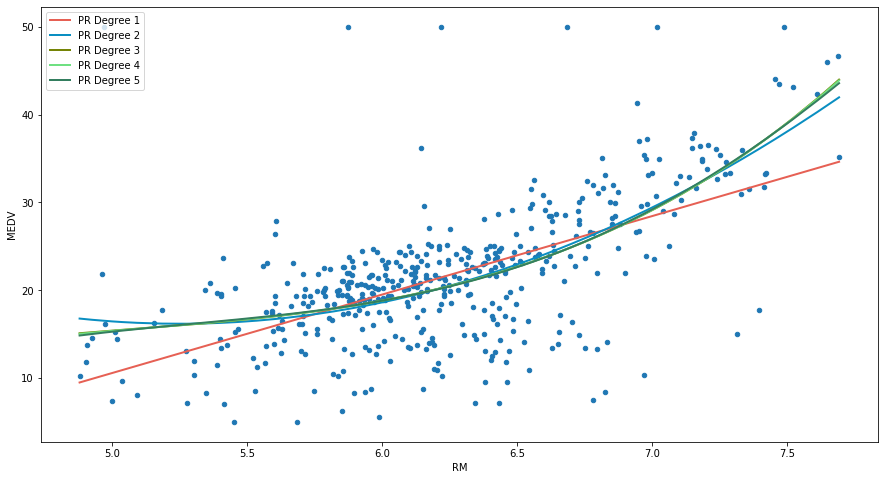

In [32]:
degree = 5

plt.figure(figsize = (15,8))
plt.scatter(clearedDf[input_feature].to_numpy().reshape(-1,1), clearedDf[output_feature].to_numpy().reshape(-1,1), s=20)

for i in range(1,degree+1):
    X_poly_2 = np.c_[np.ones((clearedDf.shape[0], 1)), polynomial_features(clearedDf.get([input_feature]).copy(), i)]
    theta_ne_2, eta_ne_2 = normalEquations(X_poly_2, clearedDf[output_feature].to_numpy().reshape(-1,1))
    sort_axis = operator.itemgetter(0)
    sorted_zip = sorted(zip(clearedDf[input_feature].to_numpy().reshape(-1,1),X_poly_2.dot(theta_ne_2)), key=sort_axis)
    x2, y_poly_pred_2 = zip(*sorted_zip)
    plt.plot(x2, y_poly_pred_2, color=np.random.rand(3,), label="PR Degree "+str(i), linewidth=2)
    plt.xlabel(input_feature)
    plt.ylabel(output_feature)
    plt.legend(loc="upper left")
plt.show()

### Plot Removing LSTAT Outliers

In [33]:
#Eseguo il conteggio degli outliers e dei non outliers
boston_iqr = X_input_tmp[~((X_input_tmp < lowerboundLSTAT) | (X_input_tmp > upperboundLSTAT))['LSTAT'] == True]
print("Number LSTAT of non-outliers samples (IQR method) : {}".format(boston_iqr.shape[0]))

outliers_iqr = X_input_tmp[((X_input_tmp < lowerboundLSTAT) | (X_input_tmp > upperboundLSTAT))['LSTAT'] == True]
print("Number LSTAT outliers samples (IQR method) : {}".format(outliers_iqr.shape[0]))

Number LSTAT of non-outliers samples (IQR method) : 499
Number LSTAT outliers samples (IQR method) : 7


In [34]:
#Visualizzo gli indici per cui gli outliers sono presenti - valori più bassi del threshold minimo
X_input_tmp.LSTAT[X_input_tmp[~(X_input_tmp < lowerboundLSTAT)].isnull()['LSTAT'] == True]
#Visualizzo gli indici per cui gli outliers sono presenti - valori più alti del threshold massimo
X_input_tmp.LSTAT[X_input_tmp[~(X_input_tmp > upperboundLSTAT)].isnull()['LSTAT'] == True]

141    34.41
373    34.77
374    37.97
387    31.99
412    34.37
414    36.98
438    34.02
Name: LSTAT, dtype: float64

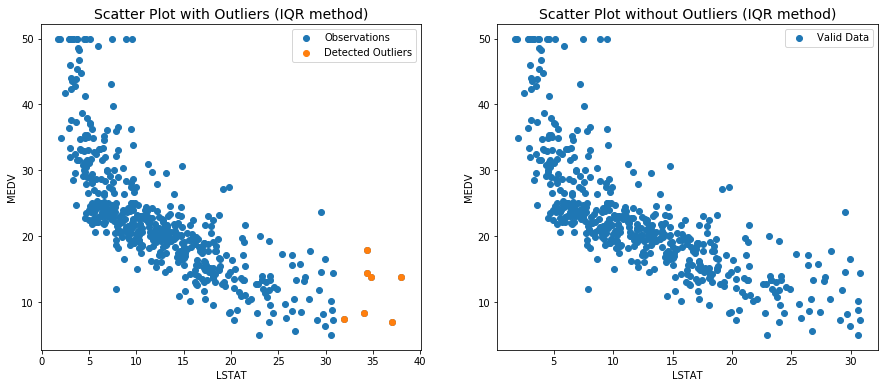

In [35]:
fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

input_feature = 'LSTAT'
output_feature = 'MEDV'

ax1.scatter(X_input_tmp[input_feature], X_input_tmp[output_feature], label = 'Observations')
ax1.scatter(outliers_iqr[input_feature], outliers_iqr[output_feature], label='Detected Outliers')
ax1.set_xlabel(input_feature)
ax1.set_ylabel(output_feature)
ax1.set_title('Scatter Plot with Outliers (IQR method)', fontsize=14)
ax1.legend()

ax2.scatter(boston_iqr[input_feature], boston_iqr[output_feature], label = 'Valid Data')
ax2.set_xlabel(input_feature)
ax2.set_ylabel(output_feature)
ax2.set_title('Scatter Plot without Outliers (IQR method)', fontsize=14)
ax2.legend()

plt.show()

### +Compare polynomial input without LSTAT Outliers with degree greater than 2 until 5 (Sklear)

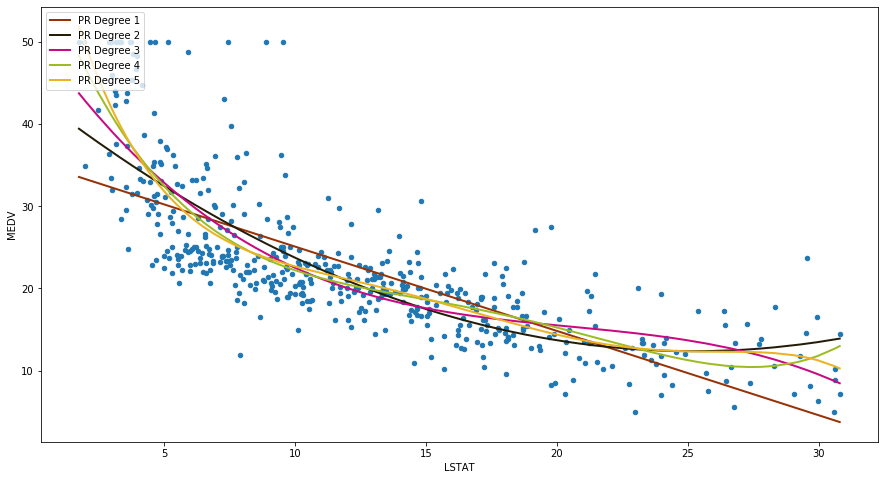

In [36]:
clearedDf = X_input_tmp.drop(outliers_iqr.index)

degree = 5

plt.figure(figsize = (15,8))
plt.scatter(clearedDf[input_feature].to_numpy().reshape(-1,1), clearedDf[output_feature].to_numpy().reshape(-1,1), s=20)

for i in range(1,degree+1):
    polynomial_features_2= PolynomialFeatures(degree=i)
    x_poly_2 = polynomial_features_2.fit_transform(clearedDf[input_feature].to_numpy().reshape(-1,1))
    model2 = LinearRegression()
    model2.fit(x_poly_2, clearedDf[output_feature].to_numpy().reshape(-1,1))
    y_poly_pred_2 = model2.predict(x_poly_2)
    sort_axis = operator.itemgetter(0)
    sorted_zip = sorted(zip(clearedDf[input_feature].to_numpy().reshape(-1,1),y_poly_pred_2), key=sort_axis)
    x2, y_poly_pred_2 = zip(*sorted_zip)
    plt.plot(x2, y_poly_pred_2, color=np.random.rand(3,), label="PR Degree "+str(i), linewidth=2)
    plt.xlabel(input_feature)
    plt.ylabel(output_feature)
    plt.legend(loc="upper left")
plt.show()

### +Compare polynomial input without RM Outliers with degree greater than 2 until 5 (Normal Equation)

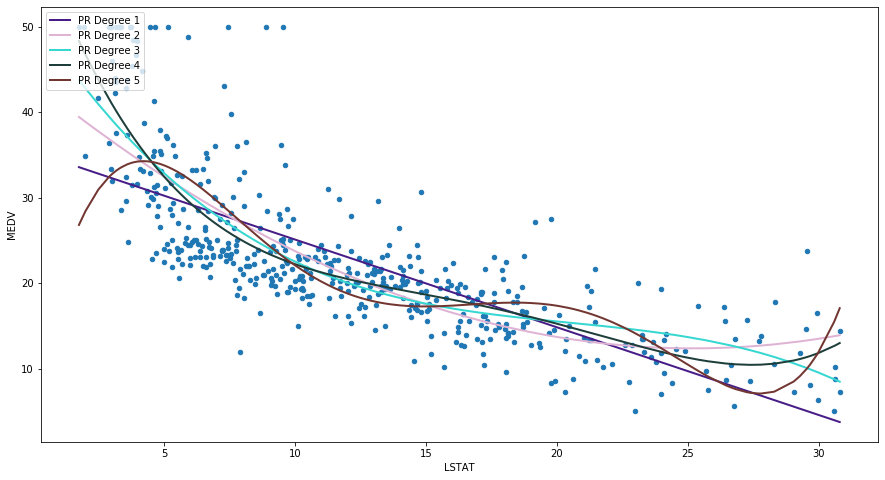

In [37]:
degree = 5

plt.figure(figsize = (15,8))
plt.scatter(clearedDf[input_feature].to_numpy().reshape(-1,1), clearedDf[output_feature].to_numpy().reshape(-1,1), s=20)

for i in range(1,degree+1):
    X_poly_2 = np.c_[np.ones((clearedDf.shape[0], 1)), polynomial_features(clearedDf.get([input_feature]).copy(), i)]
    theta_ne_2, eta_ne_2 = normalEquations(X_poly_2, clearedDf[output_feature].to_numpy().reshape(-1,1))
    sort_axis = operator.itemgetter(0)
    sorted_zip = sorted(zip(clearedDf[input_feature].to_numpy().reshape(-1,1),X_poly_2.dot(theta_ne_2)), key=sort_axis)
    x2, y_poly_pred_2 = zip(*sorted_zip)
    plt.plot(x2, y_poly_pred_2, color=np.random.rand(3,), label="PR Degree "+str(i), linewidth=2)
    plt.xlabel(input_feature)
    plt.ylabel(output_feature)
    plt.legend(loc="upper left")
plt.show()

### Plot Removing MEDV Outliers compared to RM and LSTAT

In [38]:
#Eseguo il conteggio degli outliers e dei non outliers
boston_iqr = X_input_tmp[~((X_input_tmp < lowerboundMEDV) | (X_input_tmp > upperboundMEDV))['MEDV'] == True]
print("Number MEDV of non-outliers samples (IQR method) : {}".format(boston_iqr.shape[0]))

outliers_iqr = X_input_tmp[((X_input_tmp < lowerboundMEDV) | (X_input_tmp > upperboundLSTAT))['MEDV'] == True]
print("Number MEDV outliers samples (IQR method) : {}".format(outliers_iqr.shape[0]))

Number MEDV of non-outliers samples (IQR method) : 466
Number MEDV outliers samples (IQR method) : 71


In [39]:
#Visualizzo gli indici per cui gli outliers sono presenti - valori più bassi del threshold minimo
X_input_tmp.MEDV[X_input_tmp[~(X_input_tmp < lowerboundMEDV)].isnull()['MEDV'] == True]
#Visualizzo gli indici per cui gli outliers sono presenti - valori più alti del threshold massimo
X_input_tmp.MEDV[X_input_tmp[~(X_input_tmp > upperboundMEDV)].isnull()['MEDV'] == True]

97     38.7
98     43.8
157    41.3
161    50.0
162    50.0
163    50.0
166    50.0
179    37.2
180    39.8
182    37.9
186    50.0
190    37.0
195    50.0
202    42.3
203    48.5
204    50.0
224    44.8
225    50.0
226    37.6
228    46.7
232    41.7
233    48.3
253    42.8
256    44.0
257    50.0
261    43.1
262    48.8
267    50.0
268    43.5
280    45.4
282    46.0
283    50.0
291    37.3
368    50.0
369    50.0
370    50.0
371    50.0
372    50.0
Name: MEDV, dtype: float64

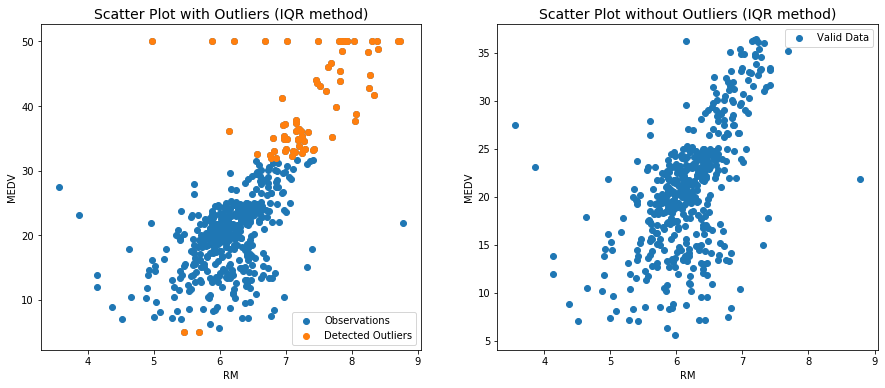

In [40]:
fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

input_feature = 'RM'
output_feature = 'MEDV'

ax1.scatter(X_input_tmp[input_feature], X_input_tmp[output_feature], label = 'Observations')
ax1.scatter(outliers_iqr[input_feature], outliers_iqr[output_feature], label='Detected Outliers')
ax1.set_xlabel(input_feature)
ax1.set_ylabel(output_feature)
ax1.set_title('Scatter Plot with Outliers (IQR method)', fontsize=14)
ax1.legend()

ax2.scatter(boston_iqr[input_feature], boston_iqr[output_feature], label = 'Valid Data')
ax2.set_xlabel(input_feature)
ax2.set_ylabel(output_feature)
ax2.set_title('Scatter Plot without Outliers (IQR method)', fontsize=14)
ax2.legend()

plt.show()

### +Compare polynomial input without MEDV Outliers with degree greater than 2 until 5 (Sklear)

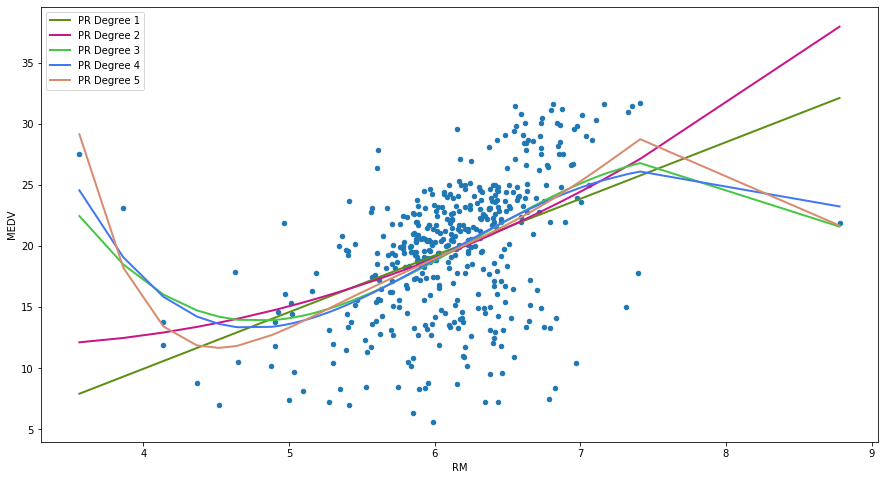

In [41]:
clearedDf = X_input_tmp.drop(outliers_iqr.index)

degree = 5

plt.figure(figsize = (15,8))
plt.scatter(clearedDf[input_feature].to_numpy().reshape(-1,1), clearedDf[output_feature].to_numpy().reshape(-1,1), s=20)

for i in range(1,degree+1):
    polynomial_features_2= PolynomialFeatures(degree=i)
    x_poly_2 = polynomial_features_2.fit_transform(clearedDf[input_feature].to_numpy().reshape(-1,1))
    model2 = LinearRegression()
    model2.fit(x_poly_2, clearedDf[output_feature].to_numpy().reshape(-1,1))
    y_poly_pred_2 = model2.predict(x_poly_2)
    sort_axis = operator.itemgetter(0)
    sorted_zip = sorted(zip(clearedDf[input_feature].to_numpy().reshape(-1,1),y_poly_pred_2), key=sort_axis)
    x2, y_poly_pred_2 = zip(*sorted_zip)
    plt.plot(x2, y_poly_pred_2, color=np.random.rand(3,), label="PR Degree "+str(i), linewidth=2)
    plt.xlabel(input_feature)
    plt.ylabel(output_feature)
    plt.legend(loc="upper left")
plt.show()

### +Compare polynomial input without MEDV Outliers with degree greater than 2 until 5 (Normal Equation)

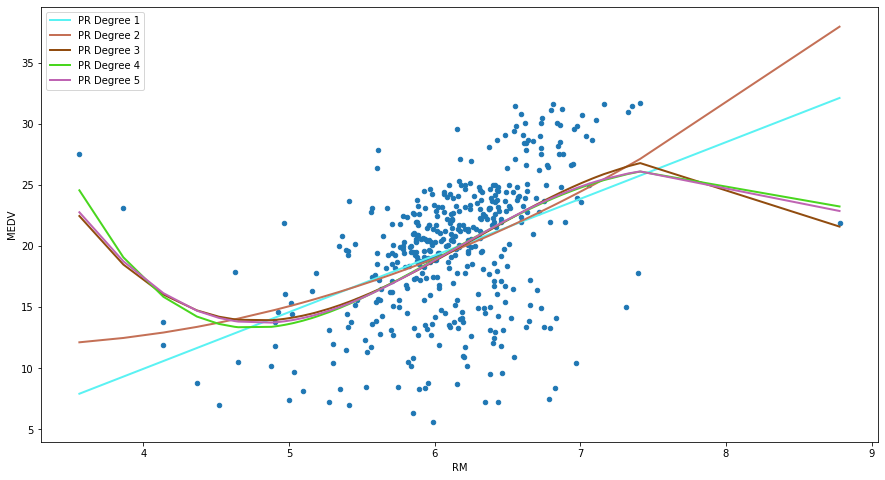

In [42]:
degree = 5

plt.figure(figsize = (15,8))
plt.scatter(clearedDf[input_feature].to_numpy().reshape(-1,1), clearedDf[output_feature].to_numpy().reshape(-1,1), s=20)

for i in range(1,degree+1):
    X_poly_2 = np.c_[np.ones((clearedDf.shape[0], 1)), polynomial_features(clearedDf.get([input_feature]).copy(), i)]
    theta_ne_2, eta_ne_2 = normalEquations(X_poly_2, clearedDf[output_feature].to_numpy().reshape(-1,1))
    sort_axis = operator.itemgetter(0)
    sorted_zip = sorted(zip(clearedDf[input_feature].to_numpy().reshape(-1,1),X_poly_2.dot(theta_ne_2)), key=sort_axis)
    x2, y_poly_pred_2 = zip(*sorted_zip)
    plt.plot(x2, y_poly_pred_2, color=np.random.rand(3,), label="PR Degree "+str(i), linewidth=2)
    plt.xlabel(input_feature)
    plt.ylabel(output_feature)
    plt.legend(loc="upper left")
plt.show()

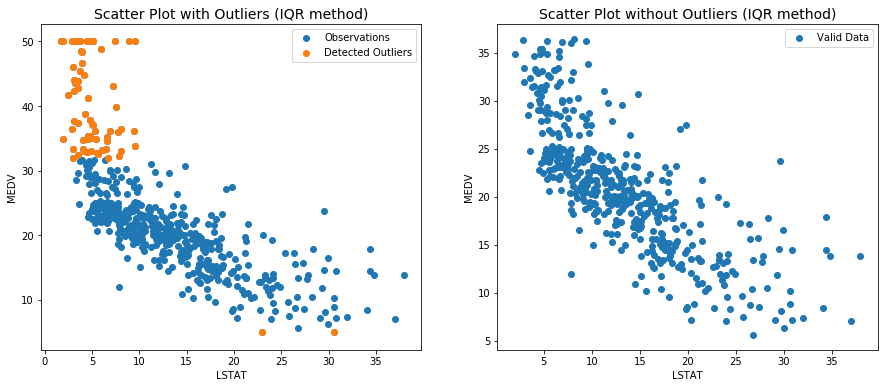

In [43]:
fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

input_feature = 'LSTAT'
output_feature = 'MEDV'

ax1.scatter(X_input_tmp[input_feature], X_input_tmp[output_feature], label = 'Observations')
ax1.scatter(outliers_iqr[input_feature], outliers_iqr[output_feature], label='Detected Outliers')
ax1.set_xlabel(input_feature)
ax1.set_ylabel(output_feature)
ax1.set_title('Scatter Plot with Outliers (IQR method)', fontsize=14)
ax1.legend()

ax2.scatter(boston_iqr[input_feature], boston_iqr[output_feature], label = 'Valid Data')
ax2.set_xlabel(input_feature)
ax2.set_ylabel(output_feature)
ax2.set_title('Scatter Plot without Outliers (IQR method)', fontsize=14)
ax2.legend()

plt.show()

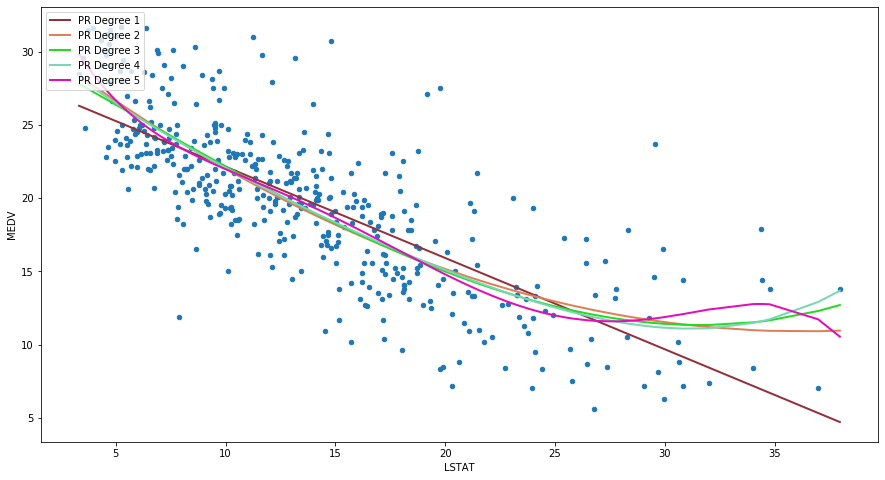

In [44]:
clearedDf = X_input_tmp.drop(outliers_iqr.index)

degree = 5

plt.figure(figsize = (15,8))
plt.scatter(clearedDf[input_feature].to_numpy().reshape(-1,1), clearedDf[output_feature].to_numpy().reshape(-1,1), s=20)

for i in range(1,degree+1):
    polynomial_features_2= PolynomialFeatures(degree=i)
    x_poly_2 = polynomial_features_2.fit_transform(clearedDf[input_feature].to_numpy().reshape(-1,1))
    model2 = LinearRegression()
    model2.fit(x_poly_2, clearedDf[output_feature].to_numpy().reshape(-1,1))
    y_poly_pred_2 = model2.predict(x_poly_2)
    sort_axis = operator.itemgetter(0)
    sorted_zip = sorted(zip(clearedDf[input_feature].to_numpy().reshape(-1,1),y_poly_pred_2), key=sort_axis)
    x2, y_poly_pred_2 = zip(*sorted_zip)
    plt.plot(x2, y_poly_pred_2, color=np.random.rand(3,), label="PR Degree "+str(i), linewidth=2)
    plt.xlabel(input_feature)
    plt.ylabel(output_feature)
    plt.legend(loc="upper left")
plt.show()

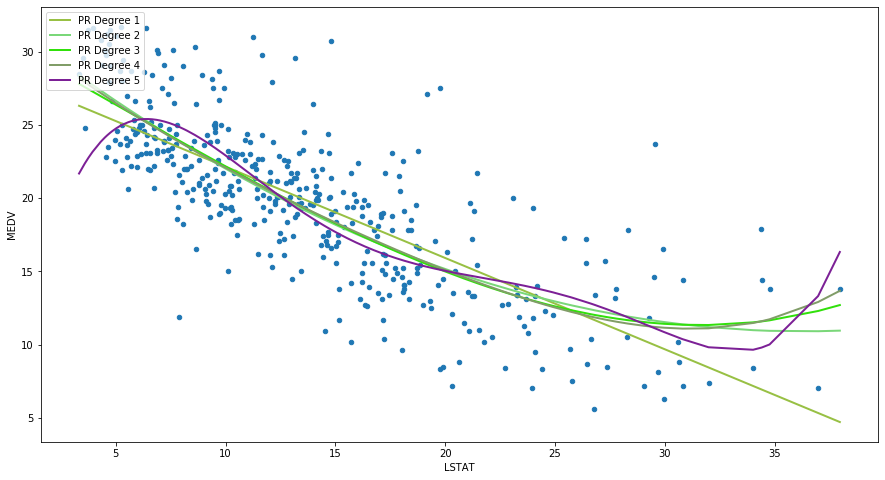

In [45]:
degree = 5

plt.figure(figsize = (15,8))
plt.scatter(clearedDf[input_feature].to_numpy().reshape(-1,1), clearedDf[output_feature].to_numpy().reshape(-1,1), s=20)

for i in range(1,degree+1):
    X_poly_2 = np.c_[np.ones((clearedDf.shape[0], 1)), polynomial_features(clearedDf.get([input_feature]).copy(), i)]
    theta_ne_2, eta_ne_2 = normalEquations(X_poly_2, clearedDf[output_feature].to_numpy().reshape(-1,1))
    sort_axis = operator.itemgetter(0)
    sorted_zip = sorted(zip(clearedDf[input_feature].to_numpy().reshape(-1,1),X_poly_2.dot(theta_ne_2)), key=sort_axis)
    x2, y_poly_pred_2 = zip(*sorted_zip)
    plt.plot(x2, y_poly_pred_2, color=np.random.rand(3,), label="PR Degree "+str(i), linewidth=2)
    plt.xlabel(input_feature)
    plt.ylabel(output_feature)
    plt.legend(loc="upper left")
plt.show()

### View Outliers method ZSCORE

#### +Outliers between RM and MEDV

In [46]:
X_input_tmp = pd.DataFrame(np.c_[X[:,1], target], columns=['RM','MEDV'])
print(X_input_tmp)

        RM  MEDV
0    6.575  24.0
1    6.421  21.6
2    7.185  34.7
3    6.998  33.4
4    7.147  36.2
..     ...   ...
501  6.593  22.4
502  6.120  20.6
503  6.976  23.9
504  6.794  22.0
505  6.030  11.9

[506 rows x 2 columns]


For threshold 2.7
Number of non-outliers samples (Z-score method) : 478
Number of outliers samples (Z-score method) : 28
(28, 2)
(28, 1)


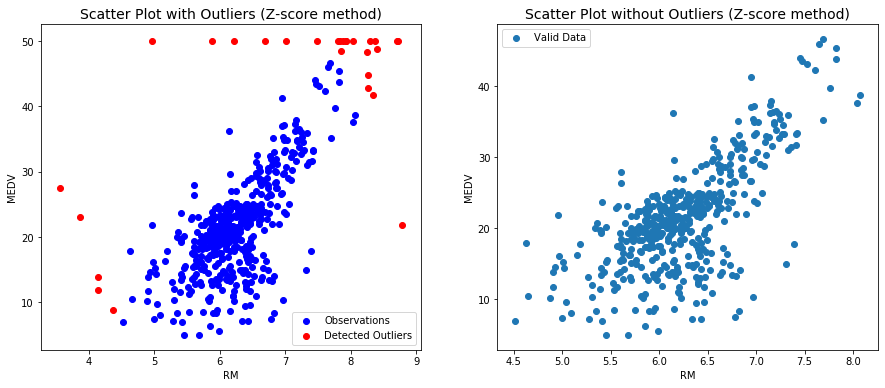

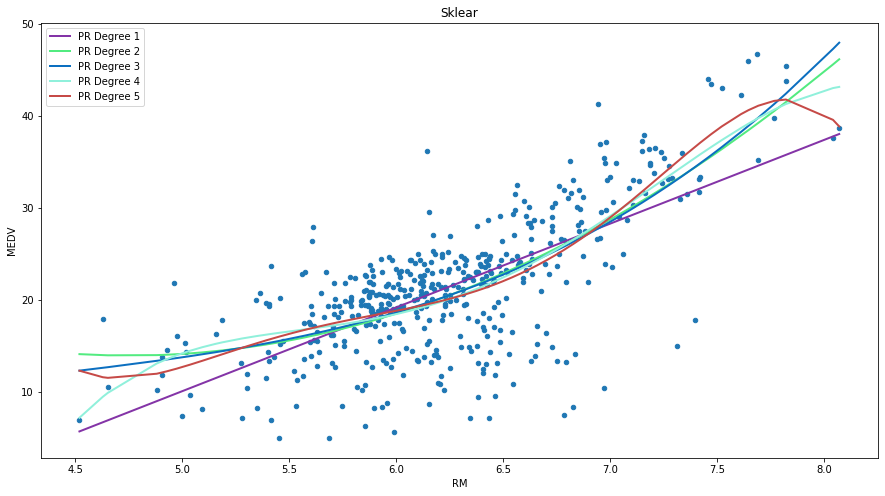

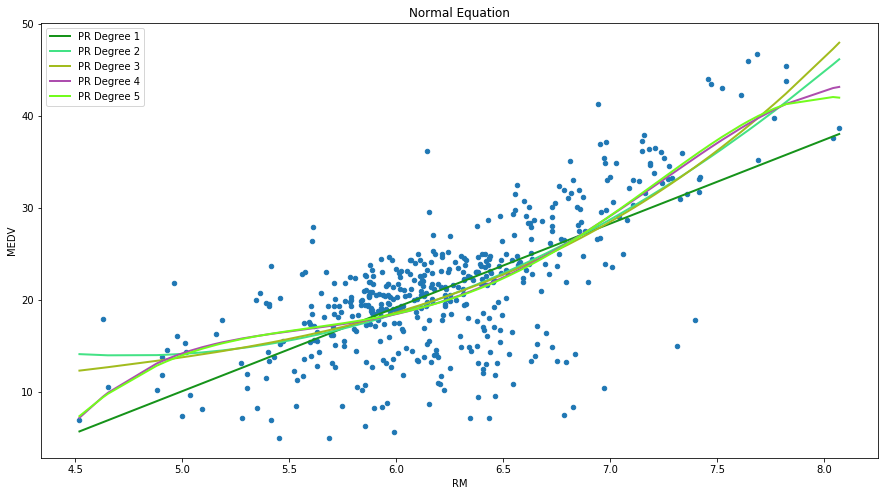

For threshold 2.9
Number of non-outliers samples (Z-score method) : 483
Number of outliers samples (Z-score method) : 23
(23, 2)
(23, 1)


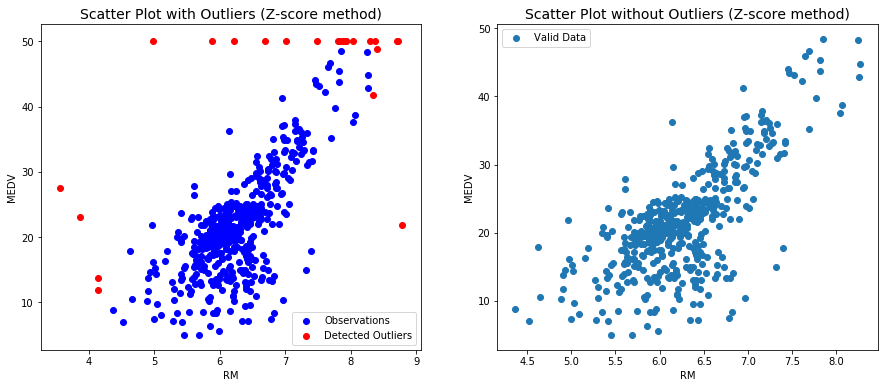

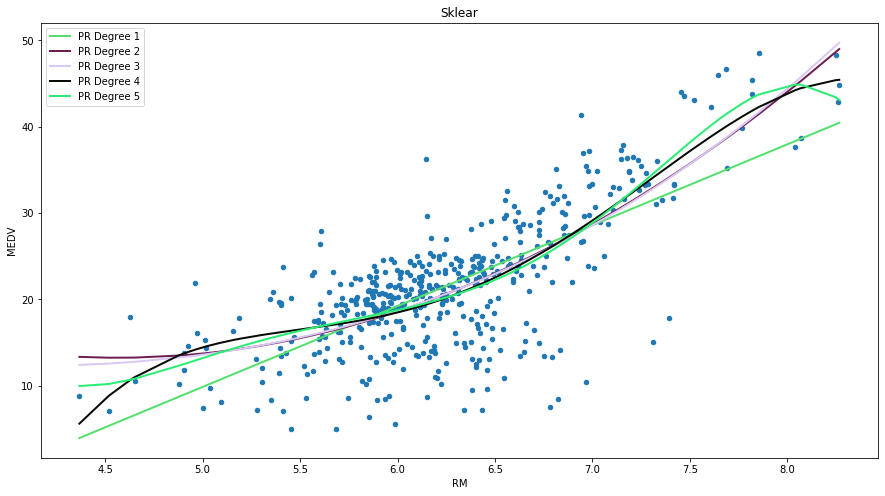

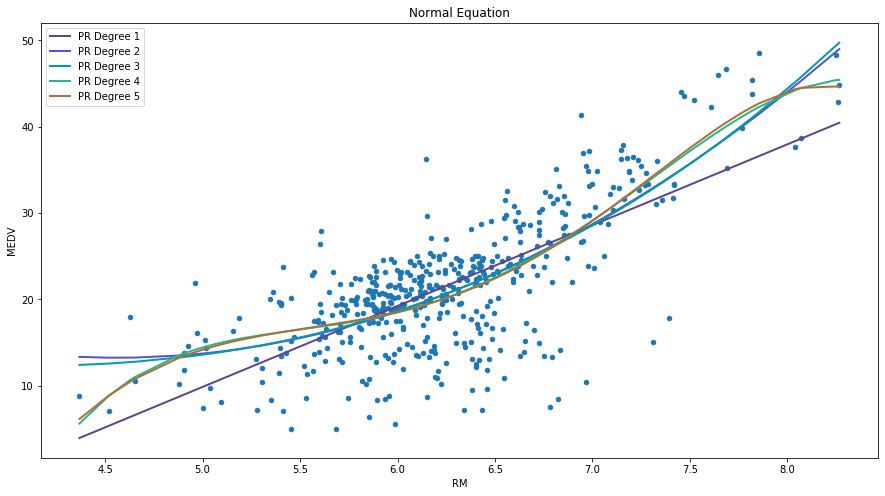

For threshold 3
Number of non-outliers samples (Z-score method) : 498
Number of outliers samples (Z-score method) : 8
(8, 2)
(8, 1)


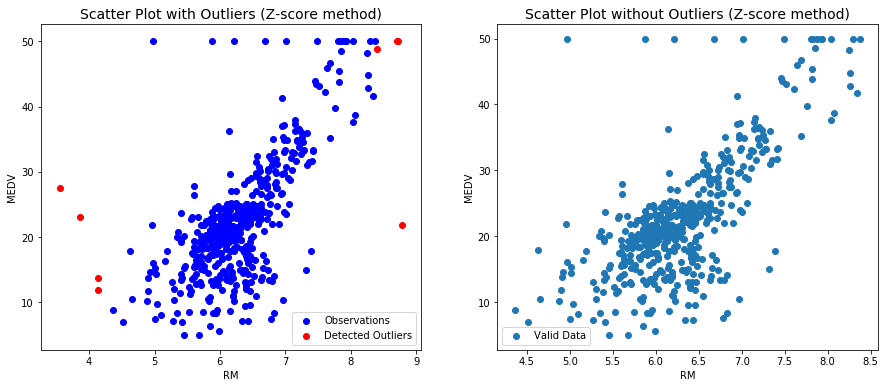

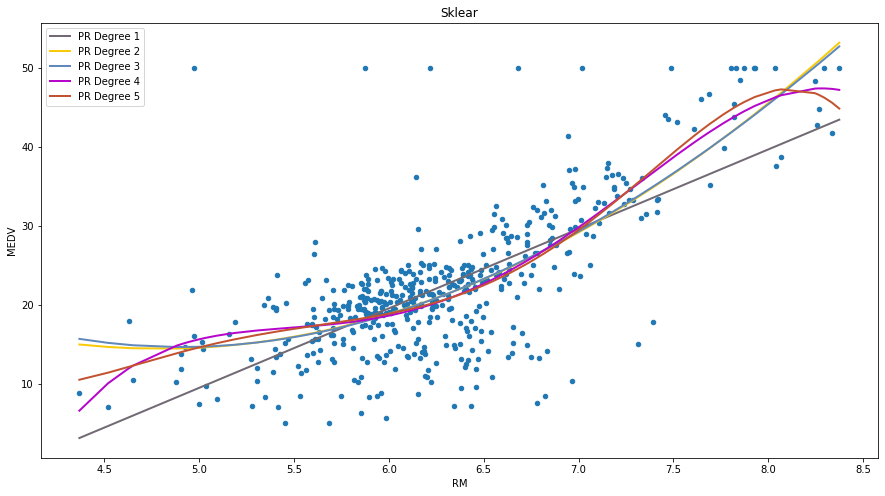

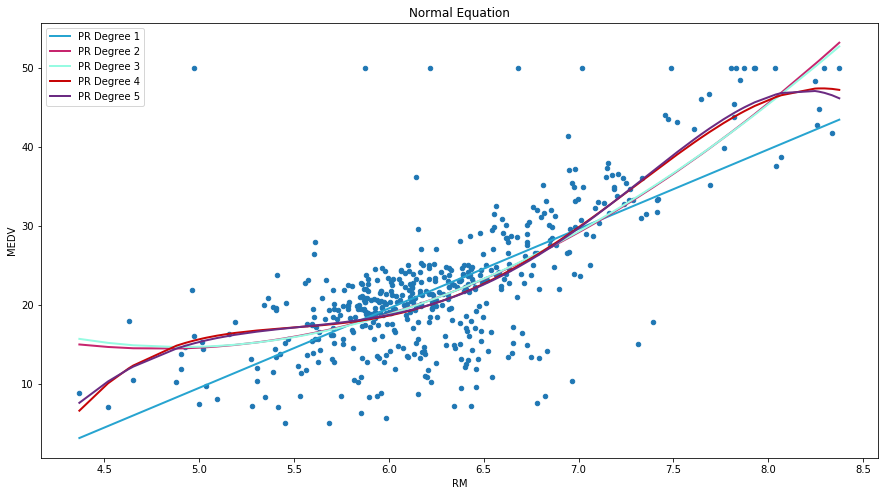

For threshold 3.1
Number of non-outliers samples (Z-score method) : 501
Number of outliers samples (Z-score method) : 5
(5, 2)
(5, 1)


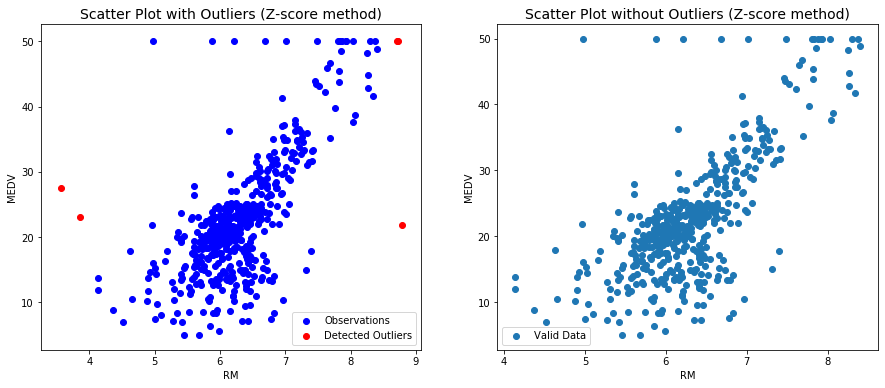

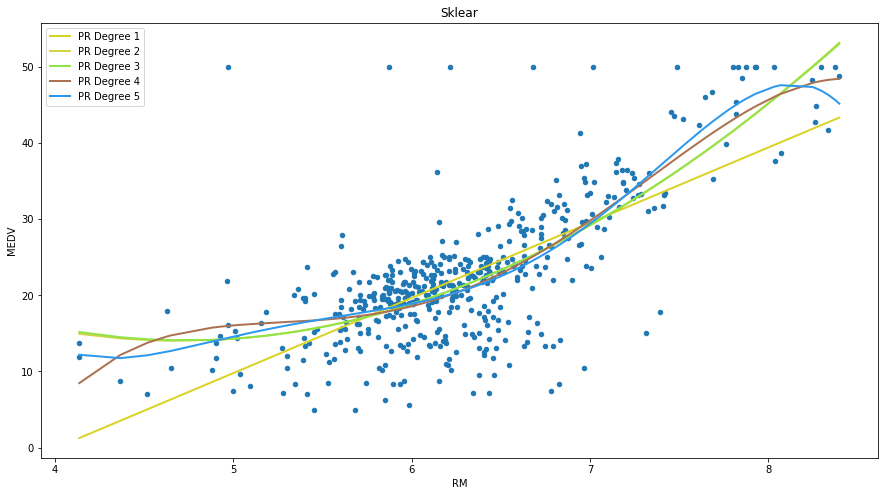

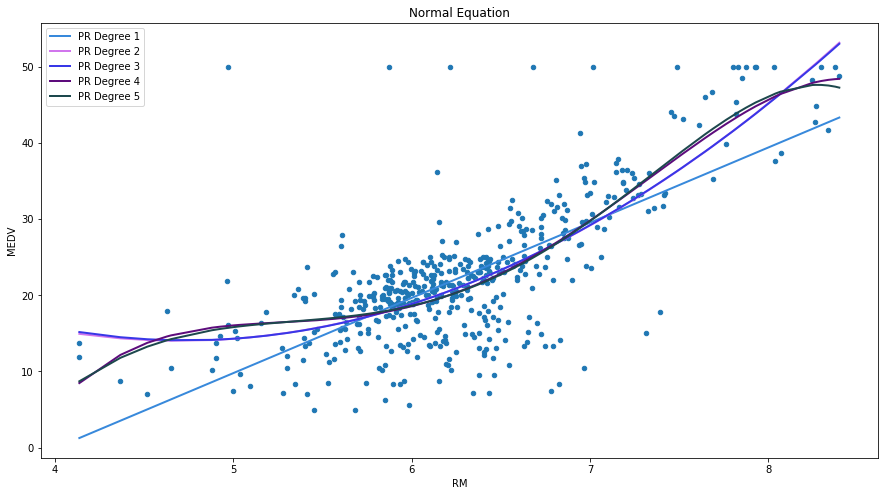

For threshold 3.2
Number of non-outliers samples (Z-score method) : 501
Number of outliers samples (Z-score method) : 5
(5, 2)
(5, 1)


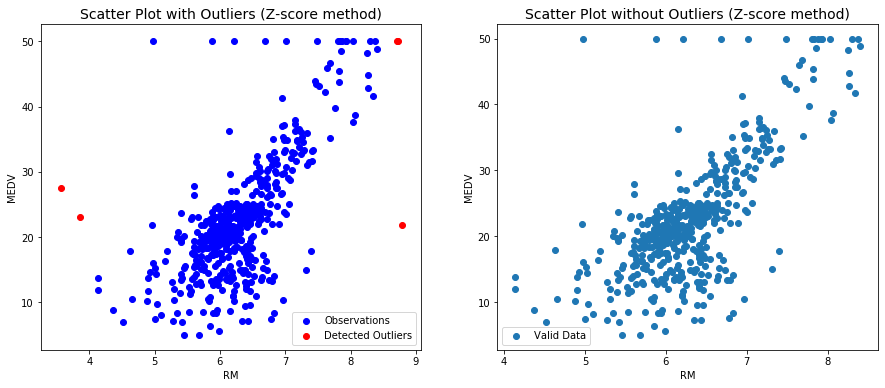

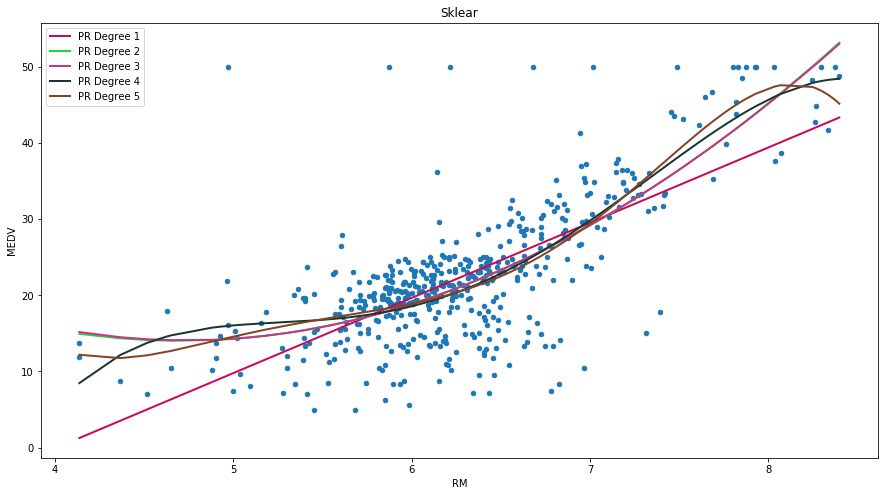

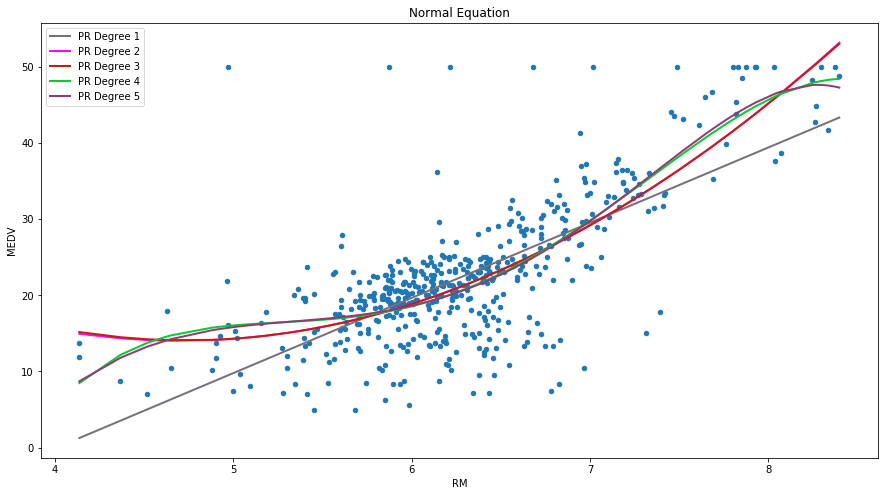

For threshold 3.3
Number of non-outliers samples (Z-score method) : 501
Number of outliers samples (Z-score method) : 5
(5, 2)
(5, 1)


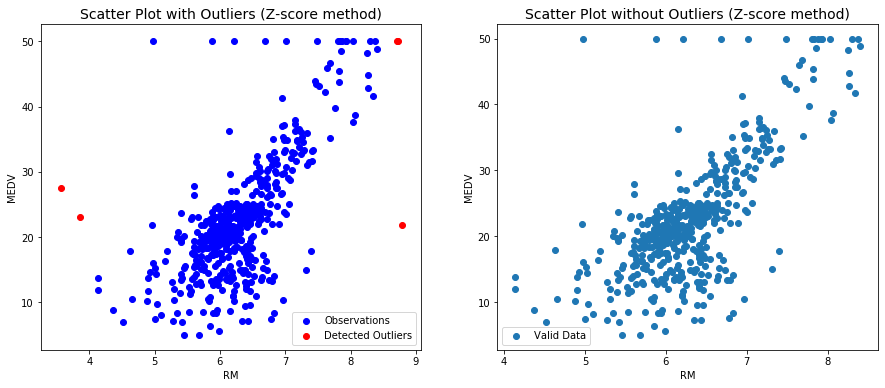

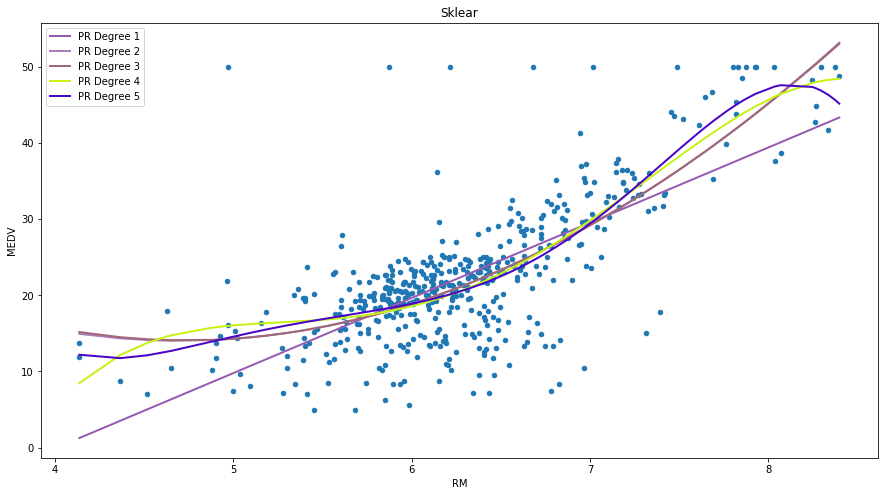

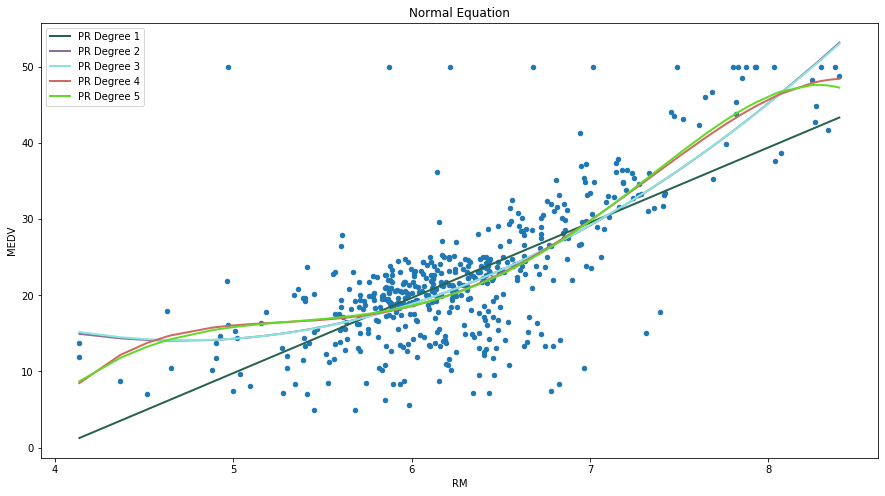

For threshold 3.5
Number of non-outliers samples (Z-score method) : 504
Number of outliers samples (Z-score method) : 2
(2, 2)
(2, 1)


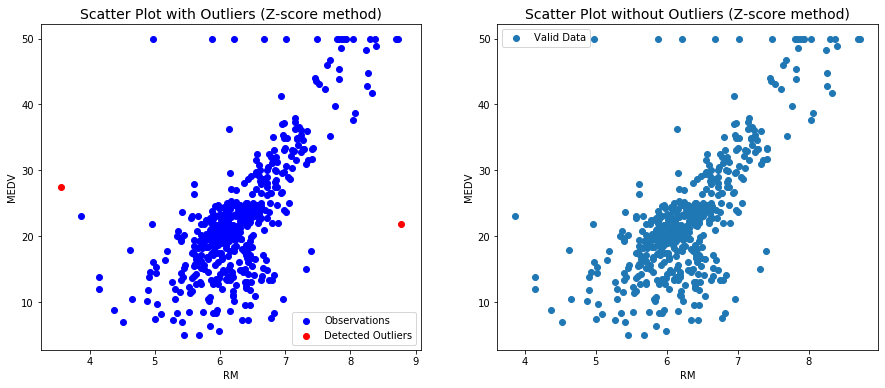

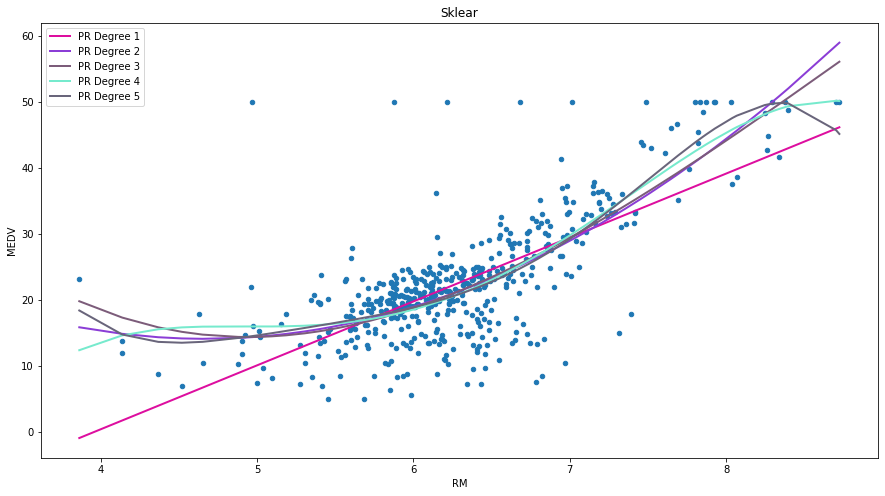

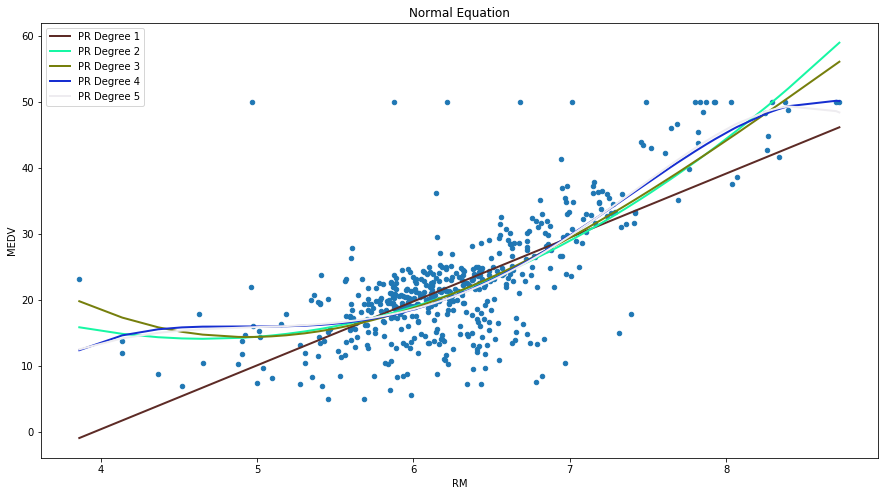

In [47]:
input_feature = 'RM'
output_feature = 'MEDV'

from scipy import stats
threshold = [2.7, 2.9, 3, 3.1, 3.2, 3.3, 3.5]
degree = 5

for i in threshold:
    print("For threshold "+str(i))
    #abs = modulo
    X_inout_wo = X_input_tmp[(np.abs(stats.zscore(X_input_tmp))<i).all(axis=1)]
    print("Number of non-outliers samples (Z-score method) : {}".format(X_inout_wo.shape[0]))
    X_inout_o = X_input_tmp[~(np.abs(stats.zscore(X_input_tmp))<i).all(axis=1)]
    print("Number of outliers samples (Z-score method) : {}".format(X_inout_o.shape[0]))

    y_inout_wo = y[X_inout_wo.index]
    y_inout_o = y[X_inout_o.index]
    
    print(X_inout_o.shape)
    print(y_inout_o.shape)
    
    fig = plt.figure(figsize=(15,6))
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)

    ax1.scatter(X_inout_wo[input_feature], y_inout_wo, label = 'Observations', c='b')
    ax1.scatter(X_inout_o[input_feature], y_inout_o, label='Detected Outliers', c='r')
    ax1.set_xlabel(input_feature)
    ax1.set_ylabel(output_feature)
    ax1.set_title('Scatter Plot with Outliers (Z-score method)', fontsize=14)
    ax1.legend()

    ax2.scatter(X_inout_wo[input_feature], y_inout_wo, label = 'Valid Data')
    ax2.set_xlabel(input_feature)
    ax2.set_ylabel(output_feature)
    ax2.set_title('Scatter Plot without Outliers (Z-score method)', fontsize=14)
    ax2.legend()
    plt.show()

    #Sklear
    plt.figure(figsize = (15,8))
    plt.scatter(X_inout_wo[input_feature], y_inout_wo, s=20)
    for i in range(1,degree+1):
        polynomial_features_2= PolynomialFeatures(degree=i)
        x_poly_2 = polynomial_features_2.fit_transform(X_inout_wo[input_feature].to_numpy().reshape(-1,1))
        model2 = LinearRegression()
        model2.fit(x_poly_2, y_inout_wo)
        y_poly_pred_2 = model2.predict(x_poly_2)
        sort_axis = operator.itemgetter(0)
        sorted_zip = sorted(zip(X_inout_wo[input_feature],y_poly_pred_2), key=sort_axis)
        x2, y_poly_pred_2 = zip(*sorted_zip)
        plt.plot(x2, y_poly_pred_2, color=np.random.rand(3,), label="PR Degree "+str(i), linewidth=2)
        plt.xlabel(input_feature)
        plt.ylabel(output_feature)
        plt.title('Sklear')
        plt.legend(loc="upper left")
    plt.show()
    
    #Normal Equation
    plt.figure(figsize = (15,8))
    plt.scatter(X_inout_wo[input_feature].to_numpy().reshape(-1,1), X_inout_wo[output_feature].to_numpy().reshape(-1,1), s=20)
    
    for i in range(1,degree+1):
        X_poly_2 = np.c_[np.ones((X_inout_wo[input_feature].shape[0], 1)), polynomial_features(X_inout_wo.get([input_feature]).copy(), i)]
        theta_ne_2, eta_ne_2 = normalEquations(X_poly_2, X_inout_wo[output_feature].to_numpy().reshape(-1,1))
        sort_axis = operator.itemgetter(0)
        sorted_zip = sorted(zip(X_inout_wo[input_feature].to_numpy().reshape(-1,1),X_poly_2.dot(theta_ne_2)), key=sort_axis)
        x2, y_poly_pred_2 = zip(*sorted_zip)
        plt.plot(x2, y_poly_pred_2, color=np.random.rand(3,), label="PR Degree "+str(i), linewidth=2)
        plt.xlabel(input_feature)
        plt.ylabel(output_feature)
        plt.title('Normal Equation')
        plt.legend(loc="upper left")
    plt.show()
   

In [48]:
X_input_tmp = pd.DataFrame(np.c_[df['LSTAT'], target], columns=['LSTAT','MEDV'])
print(X_input_tmp)

     LSTAT  MEDV
0     4.98  24.0
1     9.14  21.6
2     4.03  34.7
3     2.94  33.4
4     5.33  36.2
..     ...   ...
501   9.67  22.4
502   9.08  20.6
503   5.64  23.9
504   6.48  22.0
505   7.88  11.9

[506 rows x 2 columns]


For threshold 2.7
Number of non-outliers samples (Z-score method) : 480
Number of outliers samples (Z-score method) : 26
(26, 2)
(26, 1)


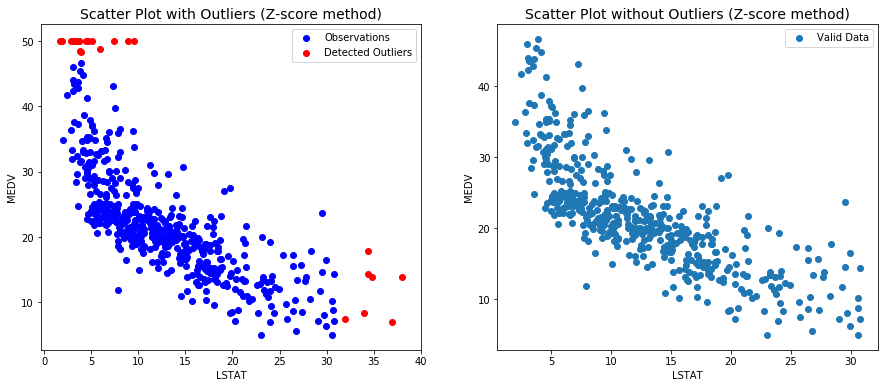

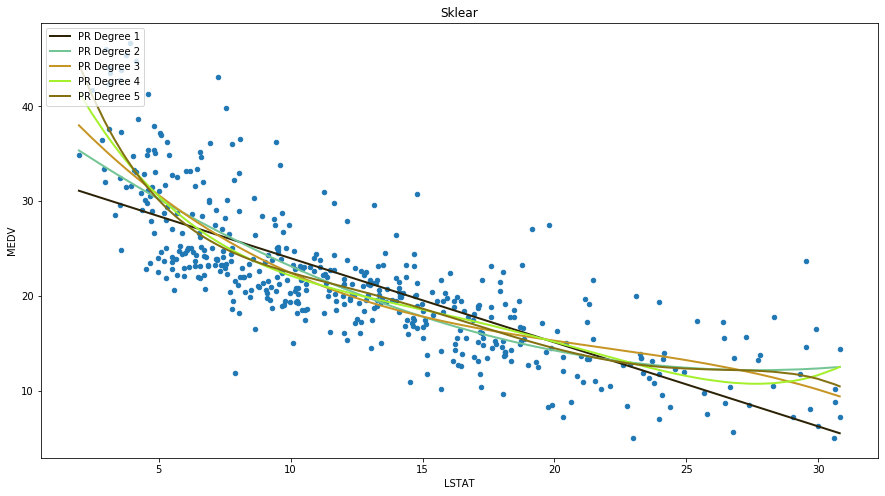

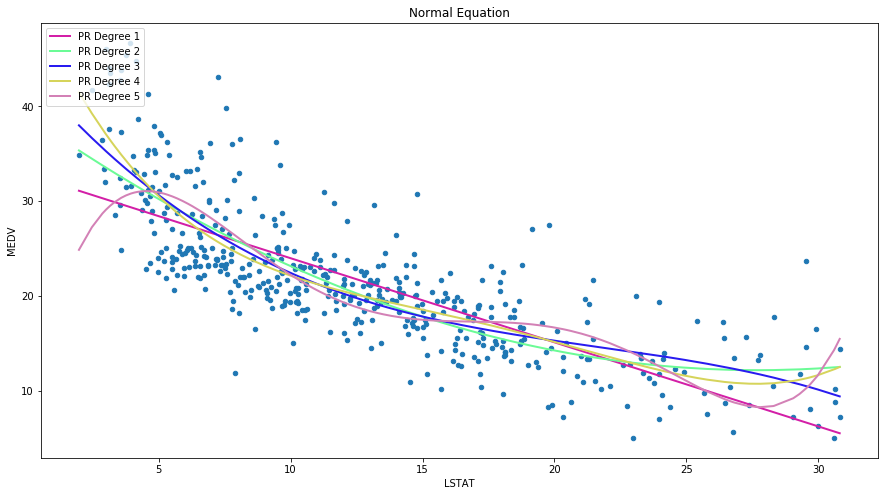

For threshold 2.9
Number of non-outliers samples (Z-score method) : 484
Number of outliers samples (Z-score method) : 22
(22, 2)
(22, 1)


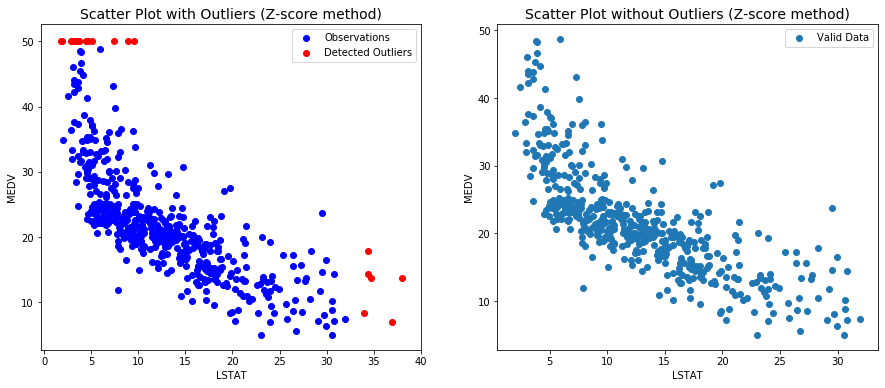

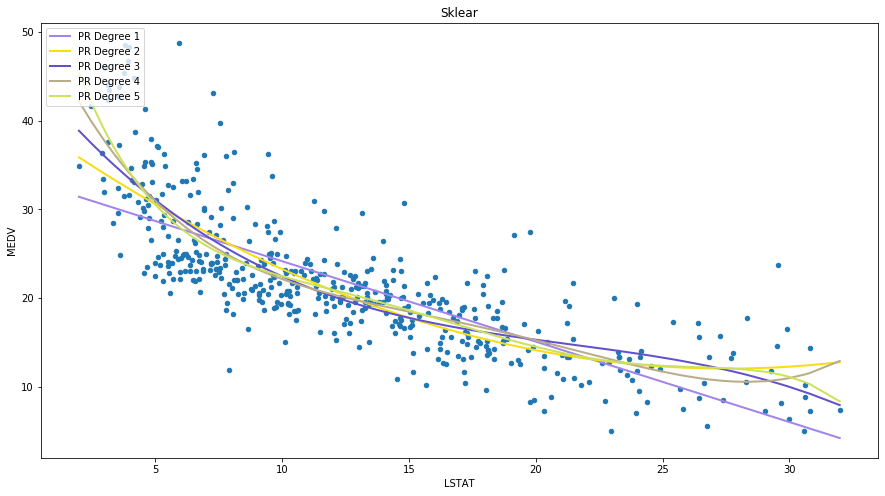

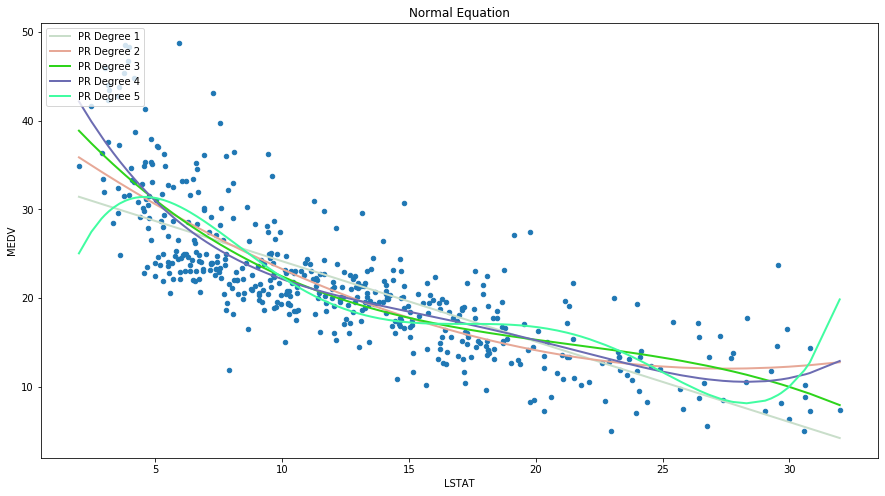

For threshold 3
Number of non-outliers samples (Z-score method) : 501
Number of outliers samples (Z-score method) : 5
(5, 2)
(5, 1)


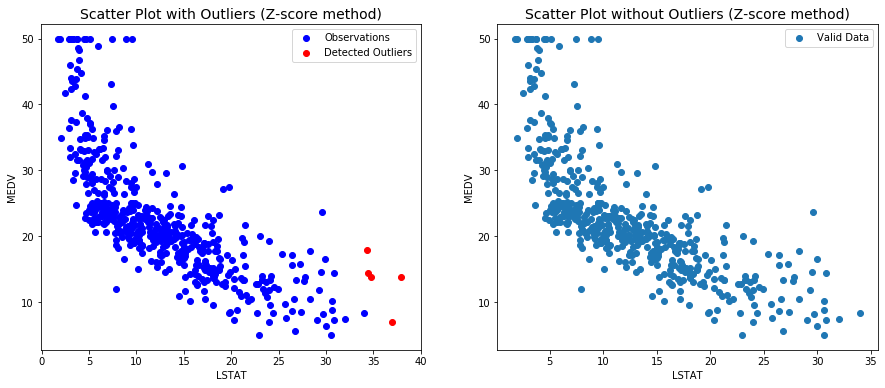

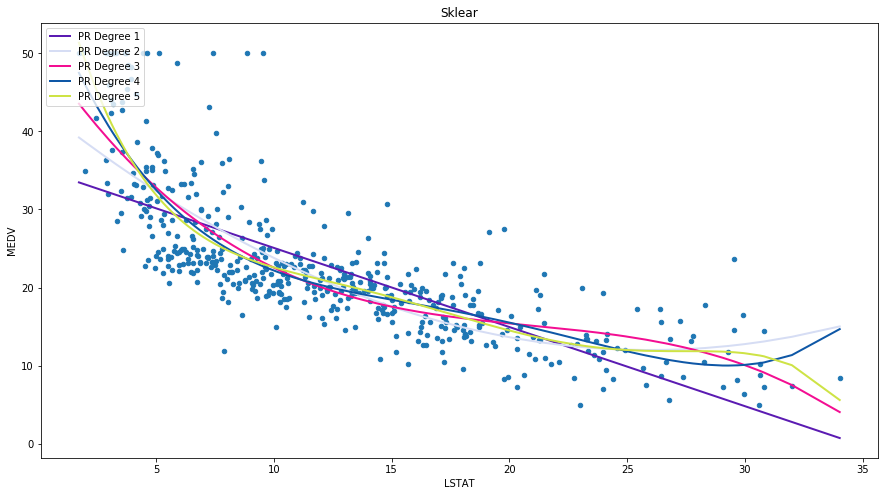

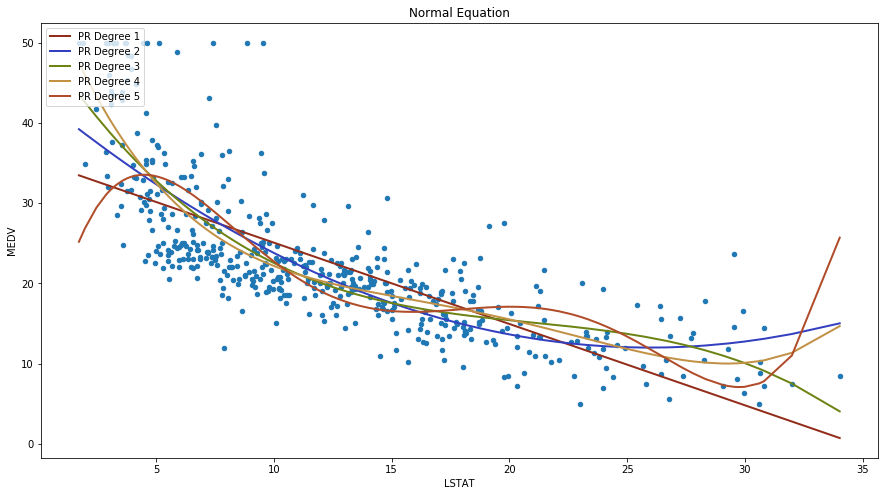

For threshold 3.1
Number of non-outliers samples (Z-score method) : 503
Number of outliers samples (Z-score method) : 3
(3, 2)
(3, 1)


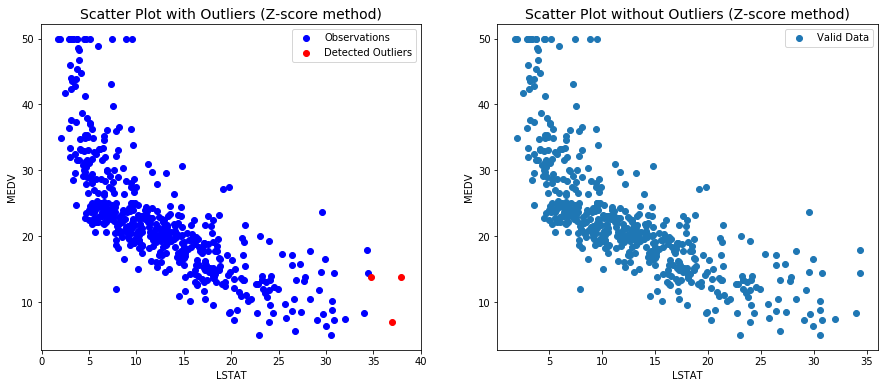

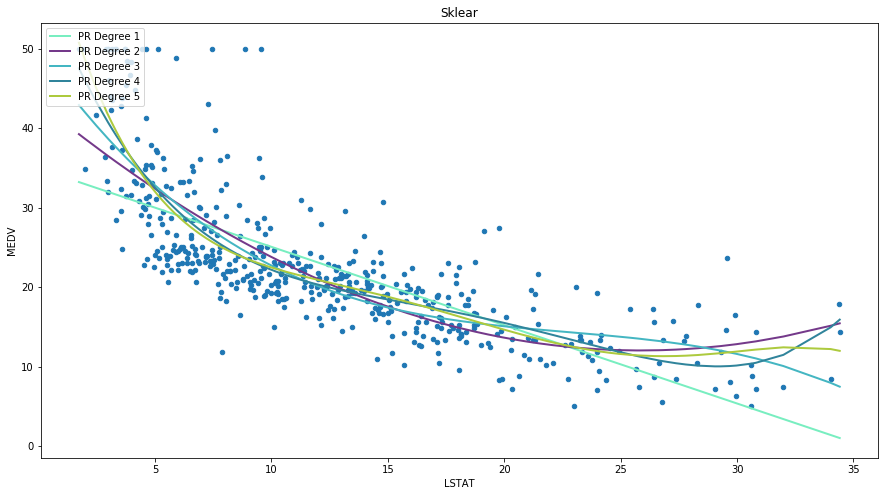

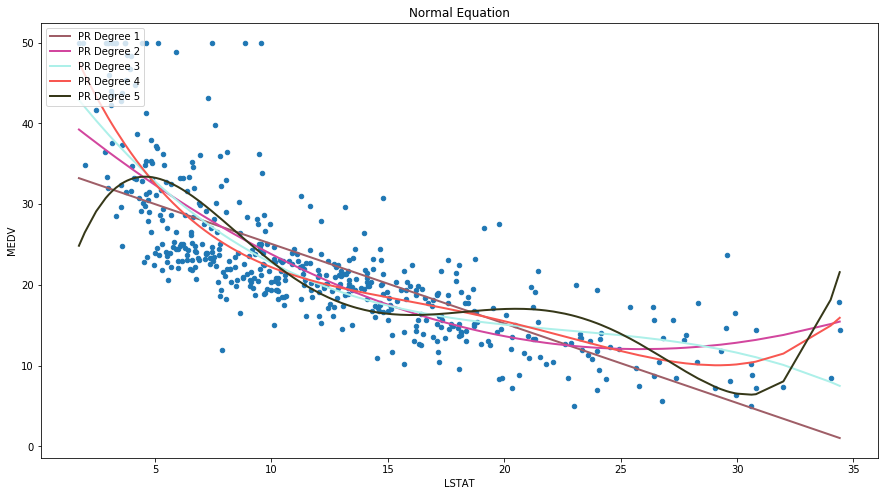

For threshold 3.2
Number of non-outliers samples (Z-score method) : 504
Number of outliers samples (Z-score method) : 2
(2, 2)
(2, 1)


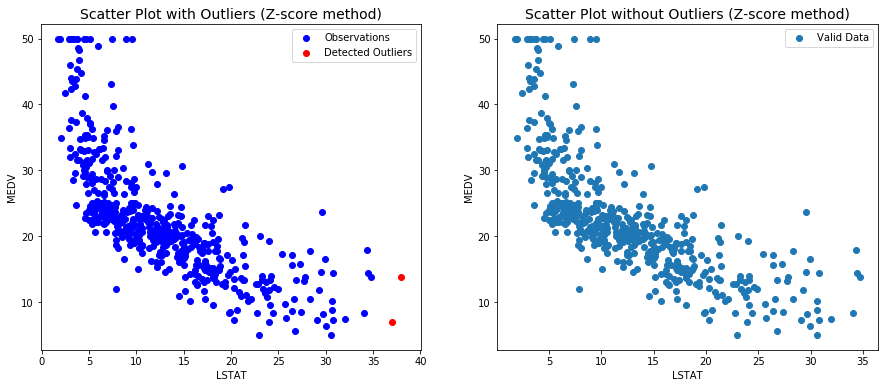

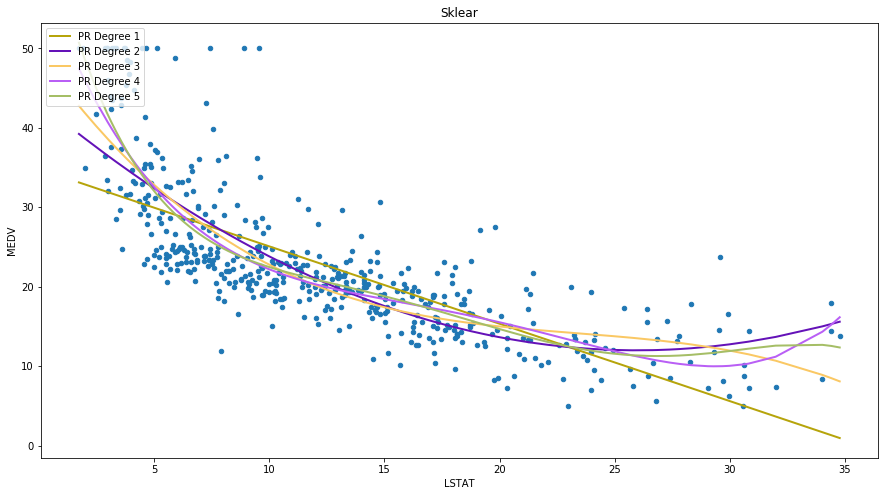

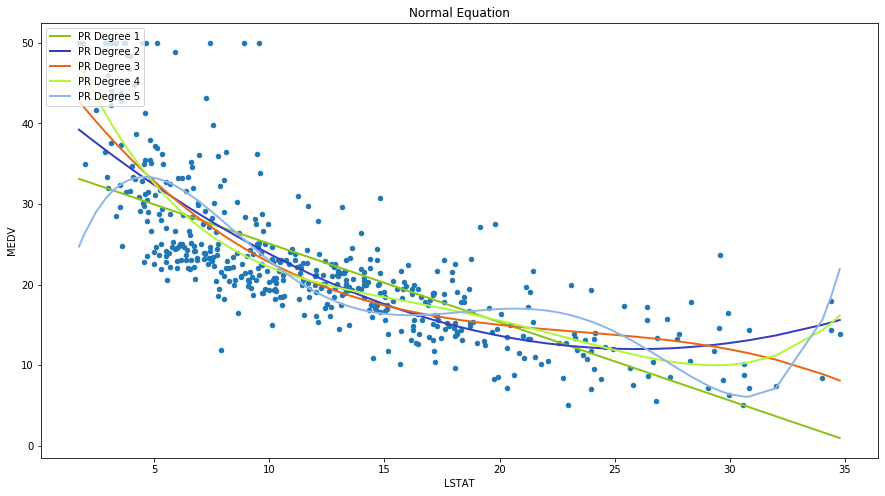

For threshold 3.3
Number of non-outliers samples (Z-score method) : 504
Number of outliers samples (Z-score method) : 2
(2, 2)
(2, 1)


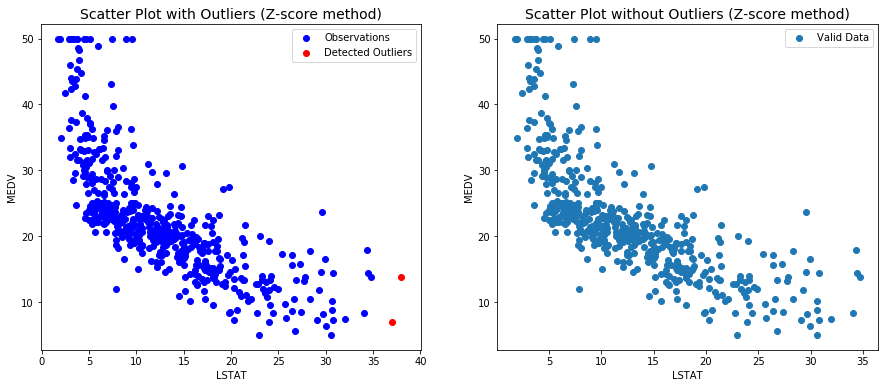

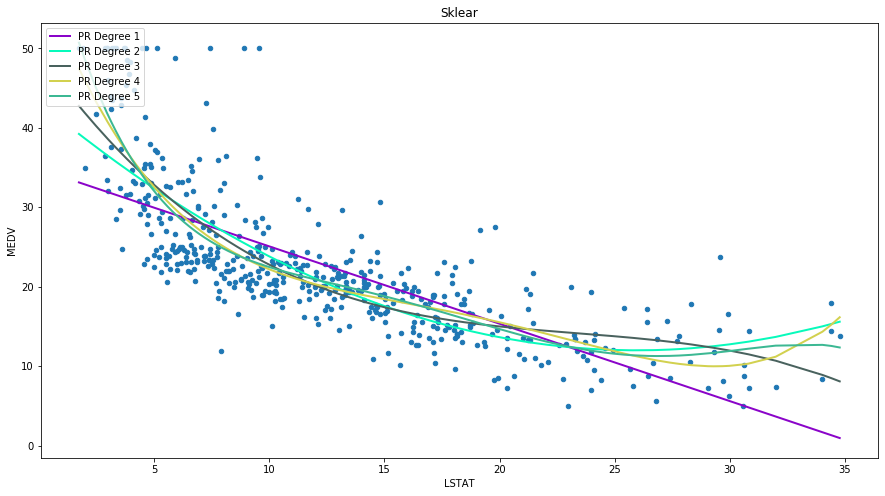

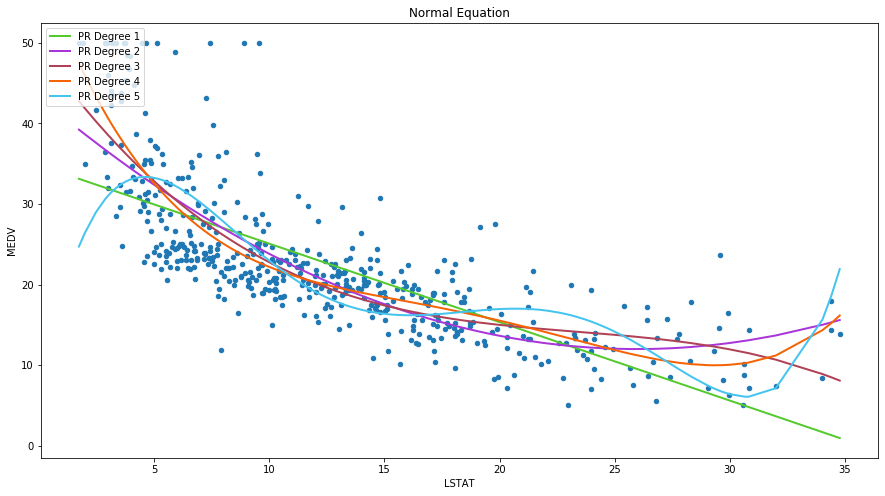

For threshold 3.5
Number of non-outliers samples (Z-score method) : 505
Number of outliers samples (Z-score method) : 1
(1, 2)
(1, 1)


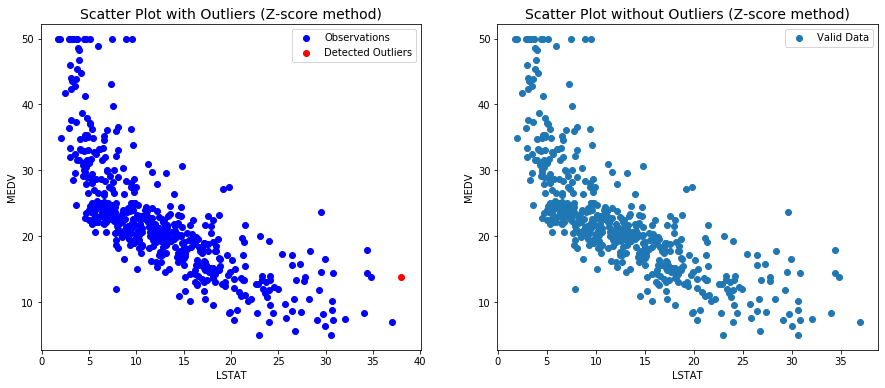

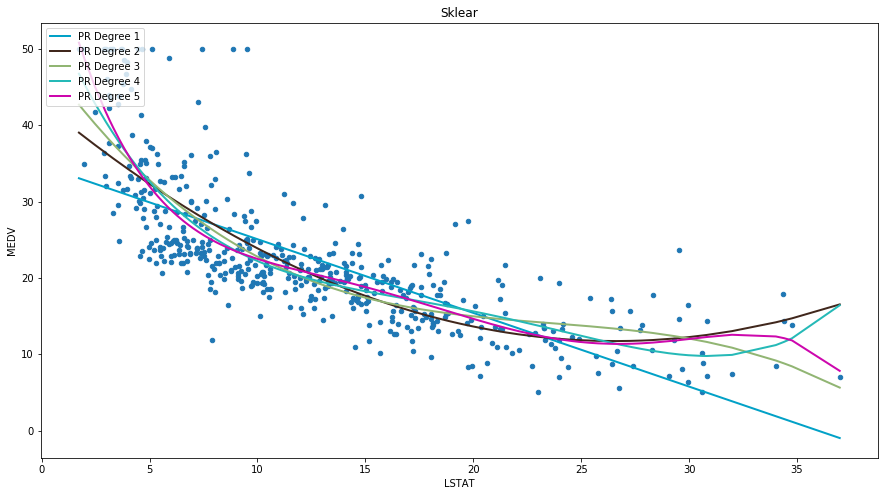

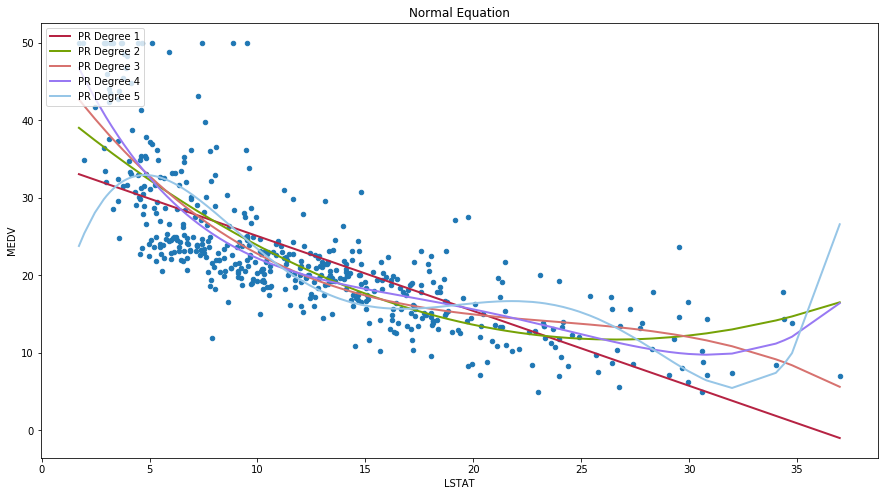

In [49]:
input_feature = 'LSTAT'
output_feature = 'MEDV'

threshold = [2.7, 2.9, 3, 3.1, 3.2, 3.3, 3.5]
degree = 5

for i in threshold:
    print("For threshold "+str(i))
    #abs = modulo
    X_inout_wo = X_input_tmp[(np.abs(stats.zscore(X_input_tmp))<i).all(axis=1)]
    print("Number of non-outliers samples (Z-score method) : {}".format(X_inout_wo.shape[0]))
    X_inout_o = X_input_tmp[~(np.abs(stats.zscore(X_input_tmp))<i).all(axis=1)]
    print("Number of outliers samples (Z-score method) : {}".format(X_inout_o.shape[0]))

    y_inout_wo = y[X_inout_wo.index]
    y_inout_o = y[X_inout_o.index]
    
    print(X_inout_o.shape)
    print(y_inout_o.shape)
    
    fig = plt.figure(figsize=(15,6))
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)

    ax1.scatter(X_inout_wo[input_feature], y_inout_wo, label = 'Observations', c='b')
    ax1.scatter(X_inout_o[input_feature], y_inout_o, label='Detected Outliers', c='r')
    ax1.set_xlabel(input_feature)
    ax1.set_ylabel(output_feature)
    ax1.set_title('Scatter Plot with Outliers (Z-score method)', fontsize=14)
    ax1.legend()

    ax2.scatter(X_inout_wo[input_feature], y_inout_wo, label = 'Valid Data')
    ax2.set_xlabel(input_feature)
    ax2.set_ylabel(output_feature)
    ax2.set_title('Scatter Plot without Outliers (Z-score method)', fontsize=14)
    ax2.legend()
    plt.show()

    #Sklear
    plt.figure(figsize = (15,8))
    plt.scatter(X_inout_wo[input_feature], y_inout_wo, s=20)
    for i in range(1,degree+1):
        polynomial_features_2= PolynomialFeatures(degree=i)
        x_poly_2 = polynomial_features_2.fit_transform(X_inout_wo[input_feature].to_numpy().reshape(-1,1))
        model2 = LinearRegression()
        model2.fit(x_poly_2, y_inout_wo)
        y_poly_pred_2 = model2.predict(x_poly_2)
        sort_axis = operator.itemgetter(0)
        sorted_zip = sorted(zip(X_inout_wo[input_feature],y_poly_pred_2), key=sort_axis)
        x2, y_poly_pred_2 = zip(*sorted_zip)
        plt.plot(x2, y_poly_pred_2, color=np.random.rand(3,), label="PR Degree "+str(i), linewidth=2)
        plt.xlabel(input_feature)
        plt.ylabel(output_feature)
        plt.title('Sklear')
        plt.legend(loc="upper left")
    plt.show()
    
    #Normal Equation
    plt.figure(figsize = (15,8))
    plt.scatter(X_inout_wo[input_feature].to_numpy().reshape(-1,1), X_inout_wo[output_feature].to_numpy().reshape(-1,1), s=20)
    
    for i in range(1,degree+1):
        X_poly_2 = np.c_[np.ones((X_inout_wo[input_feature].shape[0], 1)), polynomial_features(X_inout_wo.get([input_feature]).copy(), i)]
        theta_ne_2, eta_ne_2 = normalEquations(X_poly_2, X_inout_wo[output_feature].to_numpy().reshape(-1,1))
        sort_axis = operator.itemgetter(0)
        sorted_zip = sorted(zip(X_inout_wo[input_feature].to_numpy().reshape(-1,1),X_poly_2.dot(theta_ne_2)), key=sort_axis)
        x2, y_poly_pred_2 = zip(*sorted_zip)
        plt.plot(x2, y_poly_pred_2, color=np.random.rand(3,), label="PR Degree "+str(i), linewidth=2)
        plt.xlabel(input_feature)
        plt.ylabel(output_feature)
        plt.title('Normal Equation')
        plt.legend(loc="upper left")
    plt.show()
   

### Multivariate Outliers Analysis with Mahalanobis distance (correlation between RM and MEDV)

In statistica, la distanza di Mahalanobis è una misura di distanza introdotta da P. C. Mahalanobis nel 1936. Essa è basata sulle correlazioni tra variabili attraverso le quali differenti pattern possono essere identificati ed analizzati. Si tratta di un'utile maniera per determinare la similarità di uno spazio campionario incognito rispetto ad uno noto. Differisce dalla distanza euclidea in quanto tiene conto delle correlazioni all'interno dell'insieme dei dati.
#### Using Mahalanobis Distance
La distanza di Mahalanobis è la distanza tra un punto e una distribuzione e non tra due punti distinti. È effettivamente un equivalente multivariato della distanza euclidea. (x-m) è in realtà la distanza del vettore dalla media. Questo viene quindi diviso per la matrice di covarianza (C) o moltiplicato per l'inverso della matrice di covarianza. Se lo guardiamo, in termini semplici, è [(x-vector) - (mean)] / (matrice di covarianza) che è un equivalente multivariato della standardizzazione regolare.
Innanzitutto, calcoliamo la distanza di Mahalanobis per tutte le istanze, quindi decidiamo una soglia per la distanza di Mahalanobis oltre la quale un'istanza può essere contrassegnata come un'anomalia o come istanza sospetta.

![title](data/Mahalanobis-Distance.png)

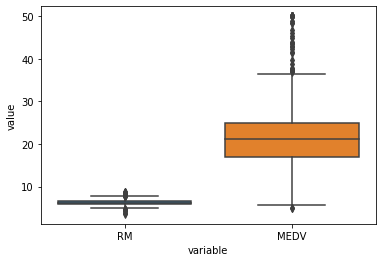

In [50]:
#Boxplot for features with high correlation
data = {'RM':  boston['RM'],
        'MEDV':  boston['MEDV'],
        }
df = pd.DataFrame (data, columns = ['RM','MEDV'])
sns.boxplot(x="variable", y="value", data=pd.melt(df))

In [51]:
import scipy as sp
def mahalanobis(x=None, data=None, cov=None):
    """Compute the Mahalanobis Distance between each row of x and the data  
    x    : vector or matrix of data with, say, p columns.
    data : ndarray of the distribution from which Mahalanobis distance of each observation of x is to be computed.
    cov  : covariance matrix (p x p) of the distribution. If None, will be computed from data.
    """
    x_minus_mu = x - np.mean(data)
    if not cov:
        cov = np.cov(data.values.T)
    inv_covmat = sp.linalg.inv(cov)
    left_term = np.dot(x_minus_mu, inv_covmat)
    mahal = np.dot(left_term, x_minus_mu.T)
    return mahal.diagonal()

df['MAHALA'] = mahalanobis(x=df, data=df[['RM','MEDV']])

### +Analysis with IQR method

In [52]:
Q1 = df.quantile(0.25)
Q2 = df.quantile(0.5)
Q3 = df.quantile(0.75)

IQR = Q3 - Q1
lower_range = Q1 - (1.5 * IQR)
upper_range = Q3 + (1.5 * IQR)

lowerboundMAHALA = lower_range['MAHALA']
upperboundMAHALA = upper_range['MAHALA']
print("The extremes for MAHALA are {} / {}".format(lowerboundMAHALA, upperboundMAHALA))

The extremes for MAHALA are -2.552949650322455 / 4.951321347752124


In [53]:
boston_q1 = df[~(df < (Q1 - 1.5 * IQR))]
print("Detect samples below the lower threshold")
print(boston_q1.isnull().sum())

print("")

boston_q2 = df[~(df > (Q3 + 1.5 * IQR))]
print("Detect samples above the upper threshold")
print(boston_q2.isnull().sum())

Detect samples below the lower threshold
RM        8
MEDV      2
MAHALA    0
dtype: int64

Detect samples above the upper threshold
RM        22
MEDV      38
MAHALA    49
dtype: int64


In [54]:
#Eseguo il conteggio degli outliers e dei non outliers
boston_iqr = df[~((df < lowerboundMAHALA) | (df > upperboundMAHALA))['MAHALA'] == True]
print("Number MAHALA of non-outliers samples (IQR method) : {}".format(boston_iqr.shape[0]))

outliers_iqr = df[((df < lowerboundMAHALA) | (df > upperboundMAHALA))['MAHALA'] == True]
print("Number MAHALA outliers samples (IQR method) : {}".format(outliers_iqr.shape[0]))

Number MAHALA of non-outliers samples (IQR method) : 457
Number MAHALA outliers samples (IQR method) : 49


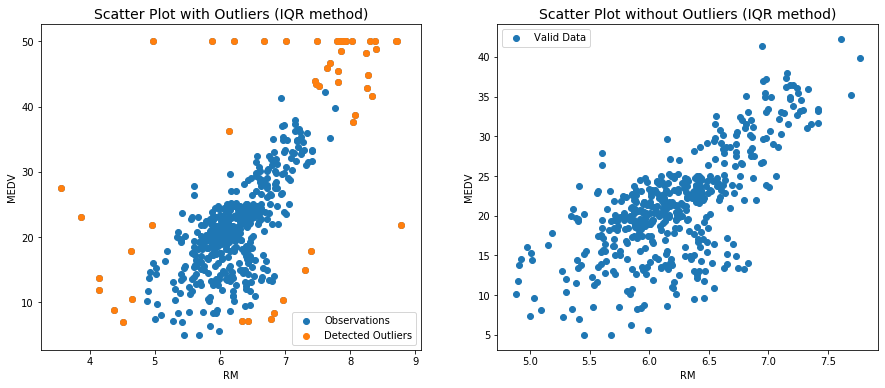

In [55]:
fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

input_feature = 'RM'
output_feature = 'MEDV'

ax1.scatter(df[input_feature], df[output_feature], label = 'Observations')
ax1.scatter(outliers_iqr[input_feature], outliers_iqr[output_feature], label='Detected Outliers')
ax1.set_xlabel(input_feature)
ax1.set_ylabel(output_feature)
ax1.set_title('Scatter Plot with Outliers (IQR method)', fontsize=14)
ax1.legend()

ax2.scatter(boston_iqr[input_feature], boston_iqr[output_feature], label = 'Valid Data')
ax2.set_xlabel(input_feature)
ax2.set_ylabel(output_feature)
ax2.set_title('Scatter Plot without Outliers (IQR method)', fontsize=14)
ax2.legend()

plt.show()

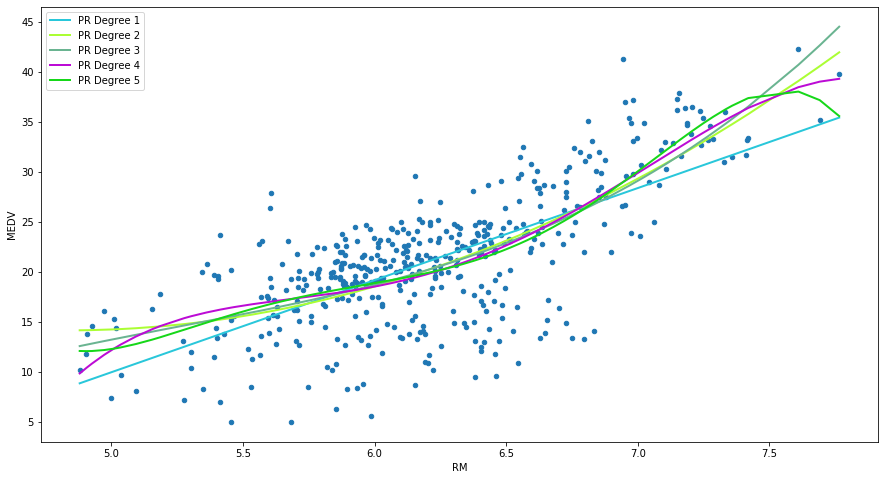

In [56]:
clearedDf = df.drop(outliers_iqr.index)

degree = 5

plt.figure(figsize = (15,8))
plt.scatter(clearedDf[input_feature].to_numpy().reshape(-1,1), clearedDf[output_feature].to_numpy().reshape(-1,1), s=20)

for i in range(1,degree+1):
    polynomial_features_2= PolynomialFeatures(degree=i)
    x_poly_2 = polynomial_features_2.fit_transform(clearedDf[input_feature].to_numpy().reshape(-1,1))
    model2 = LinearRegression()
    model2.fit(x_poly_2, clearedDf[output_feature].to_numpy().reshape(-1,1))
    y_poly_pred_2 = model2.predict(x_poly_2)
    sort_axis = operator.itemgetter(0)
    sorted_zip = sorted(zip(clearedDf[input_feature].to_numpy().reshape(-1,1),y_poly_pred_2), key=sort_axis)
    x2, y_poly_pred_2 = zip(*sorted_zip)
    plt.plot(x2, y_poly_pred_2, color=np.random.rand(3,), label="PR Degree "+str(i), linewidth=2)
    plt.xlabel(input_feature)
    plt.ylabel(output_feature)
    plt.legend(loc="upper left")
plt.show()

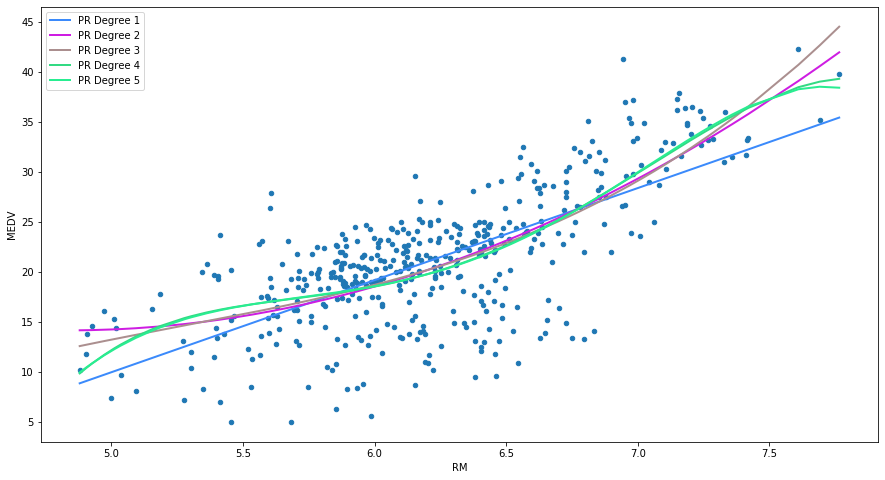

In [57]:
degree = 5

plt.figure(figsize = (15,8))
plt.scatter(clearedDf[input_feature].to_numpy().reshape(-1,1), clearedDf[output_feature].to_numpy().reshape(-1,1), s=20)

for i in range(1,degree+1):
    X_poly_2 = np.c_[np.ones((clearedDf.shape[0], 1)), polynomial_features(clearedDf.get([input_feature]).copy(), i)]
    theta_ne_2, eta_ne_2 = normalEquations(X_poly_2, clearedDf[output_feature].to_numpy().reshape(-1,1))
    sort_axis = operator.itemgetter(0)
    sorted_zip = sorted(zip(clearedDf[input_feature].to_numpy().reshape(-1,1),X_poly_2.dot(theta_ne_2)), key=sort_axis)
    x2, y_poly_pred_2 = zip(*sorted_zip)
    plt.plot(x2, y_poly_pred_2, color=np.random.rand(3,), label="PR Degree "+str(i), linewidth=2)
    plt.xlabel(input_feature)
    plt.ylabel(output_feature)
    plt.legend(loc="upper left")
plt.show()

### +Analysis with Zscore method

For threshold 2.5
Number of non-outliers samples (Z-score method) : 473
Number of outliers samples (Z-score method) : 33
(33, 3)
(33, 1)


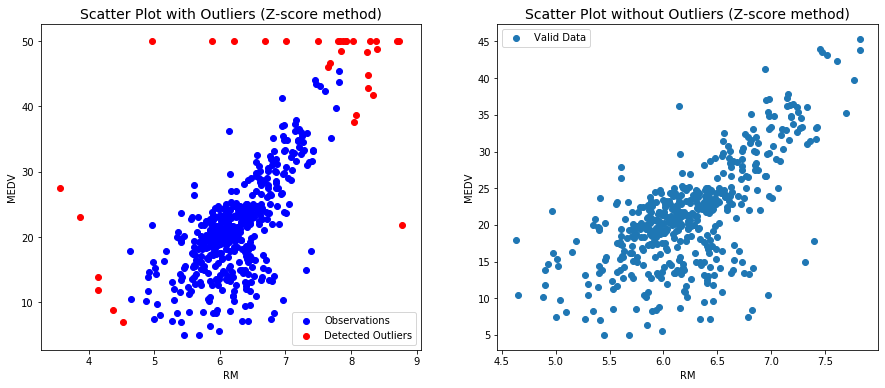

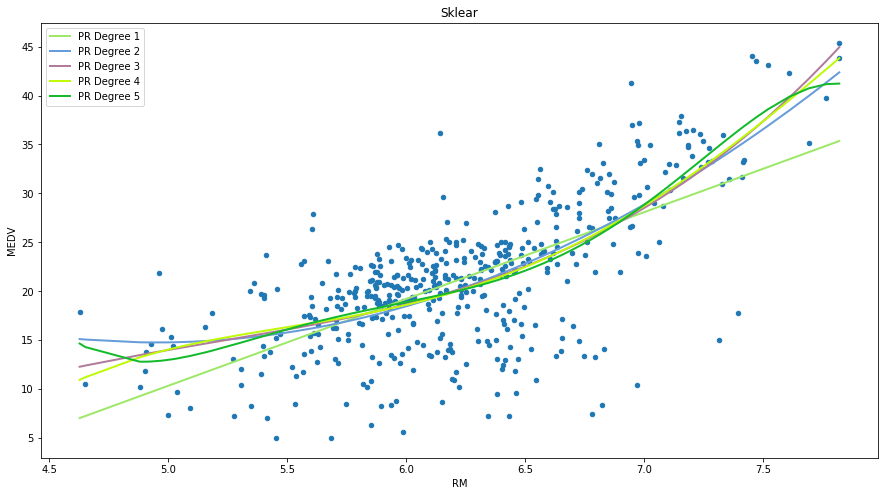

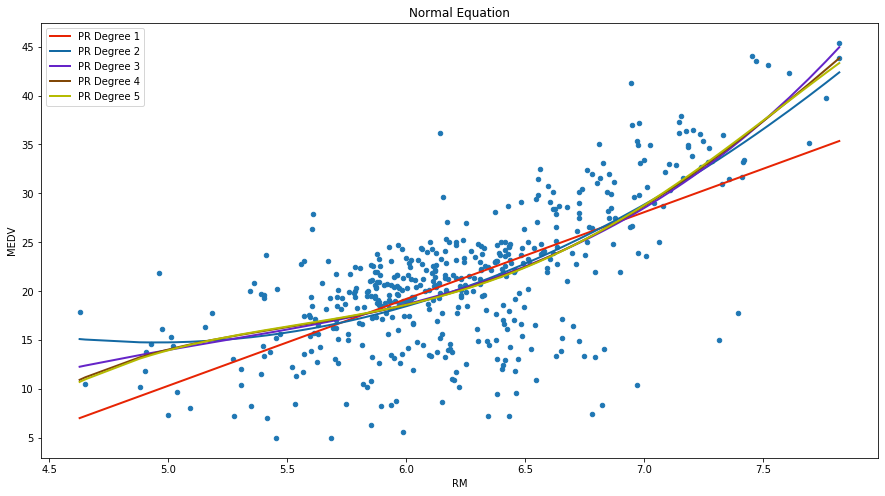

For threshold 3
Number of non-outliers samples (Z-score method) : 494
Number of outliers samples (Z-score method) : 12
(12, 3)
(12, 1)


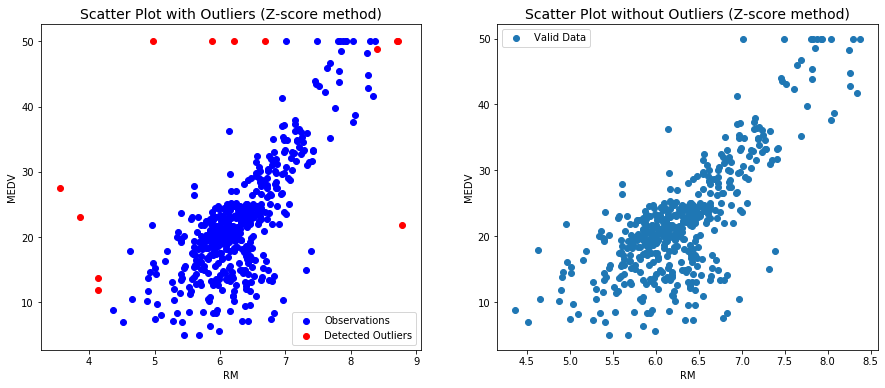

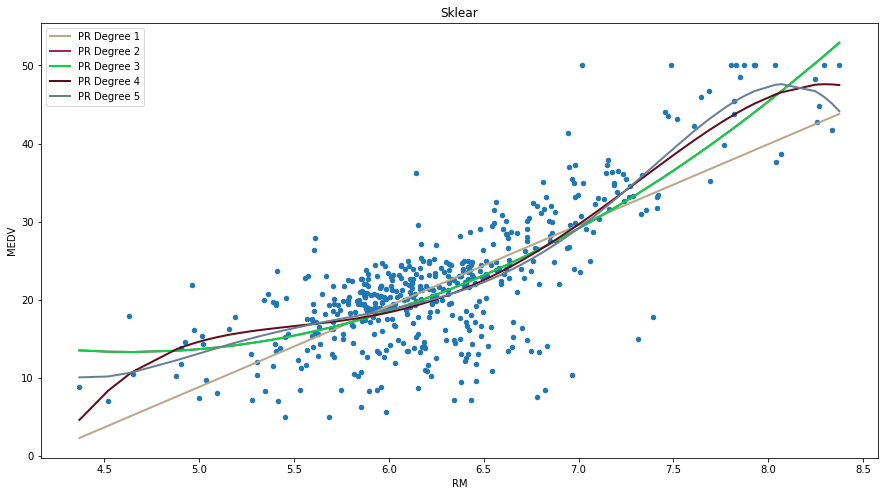

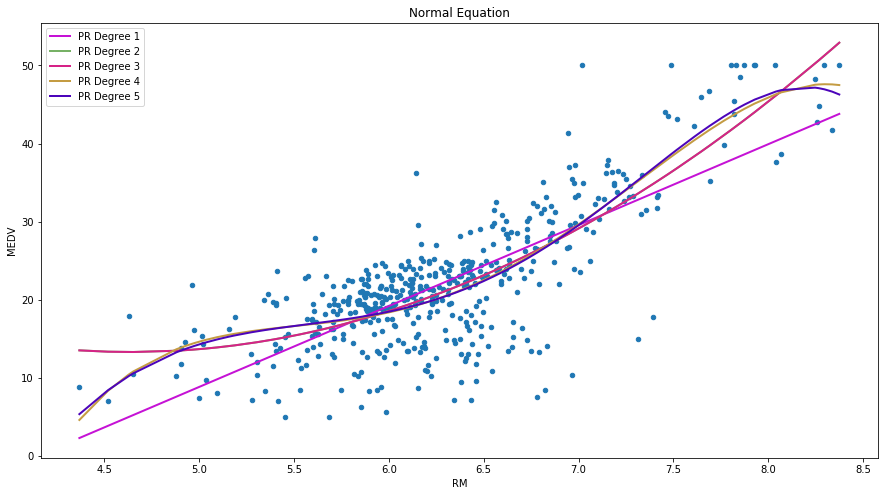

For threshold 3.5
Number of non-outliers samples (Z-score method) : 500
Number of outliers samples (Z-score method) : 6
(6, 3)
(6, 1)


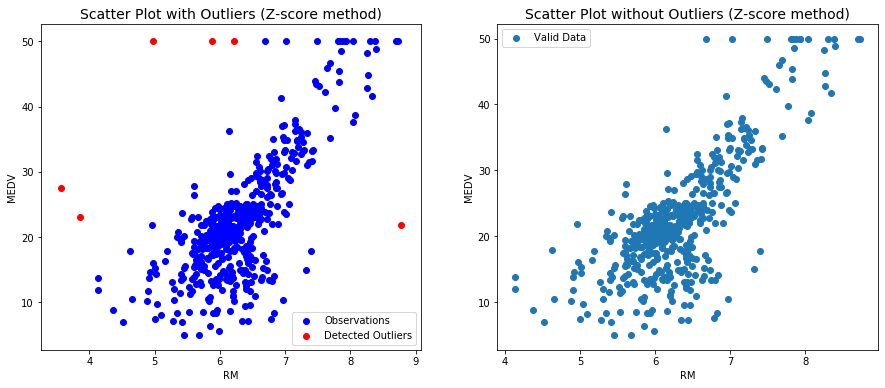

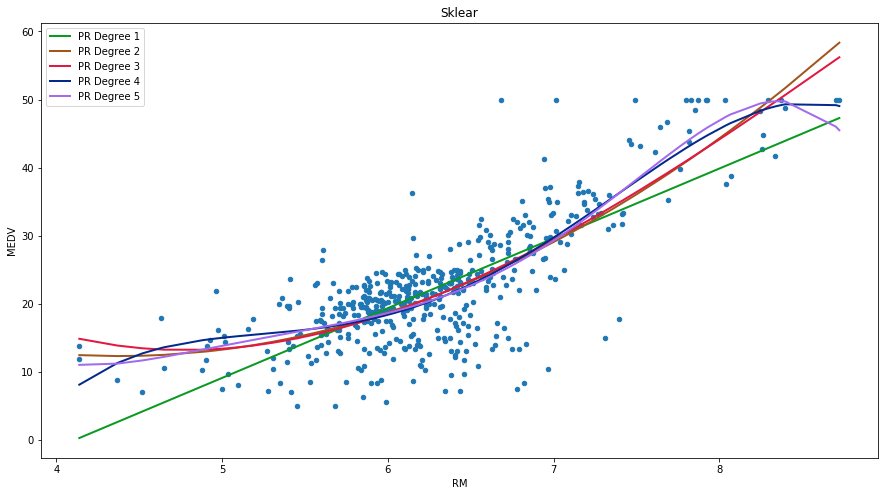

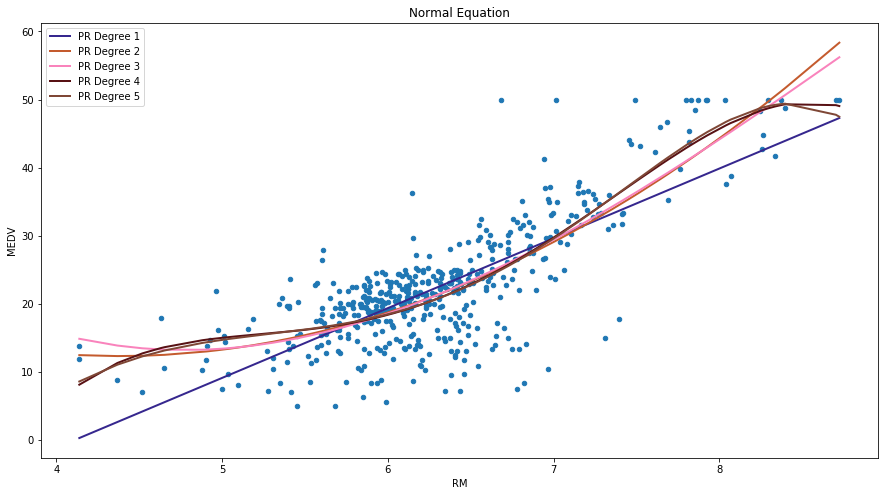

For threshold 5
Number of non-outliers samples (Z-score method) : 501
Number of outliers samples (Z-score method) : 5
(5, 3)
(5, 1)


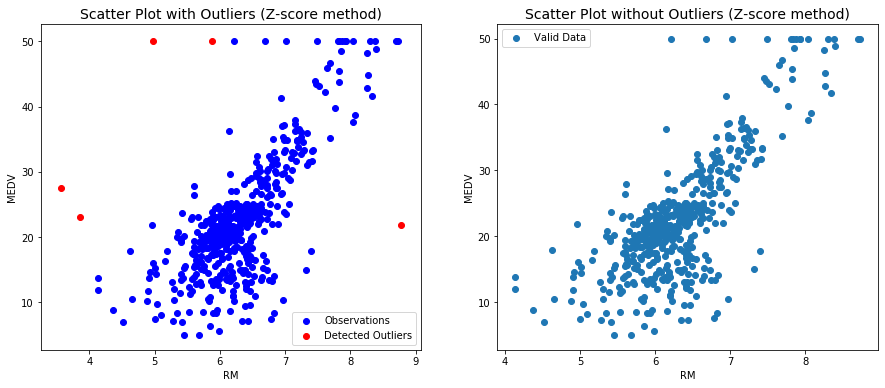

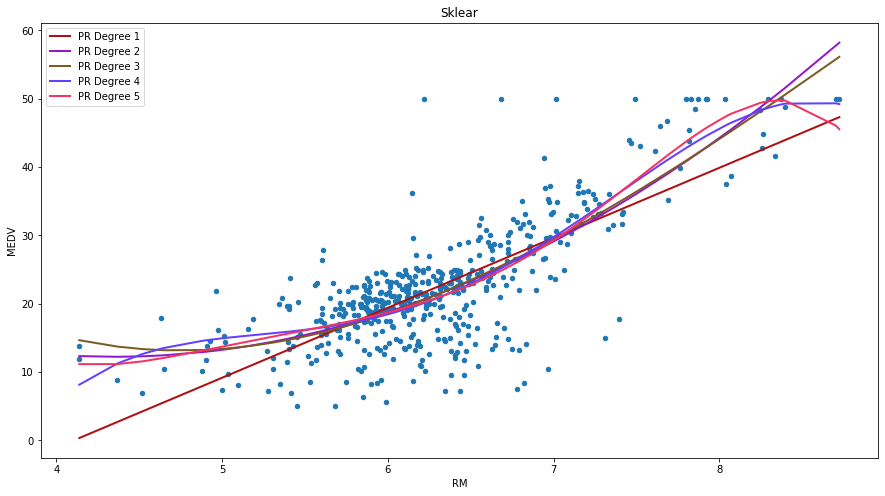

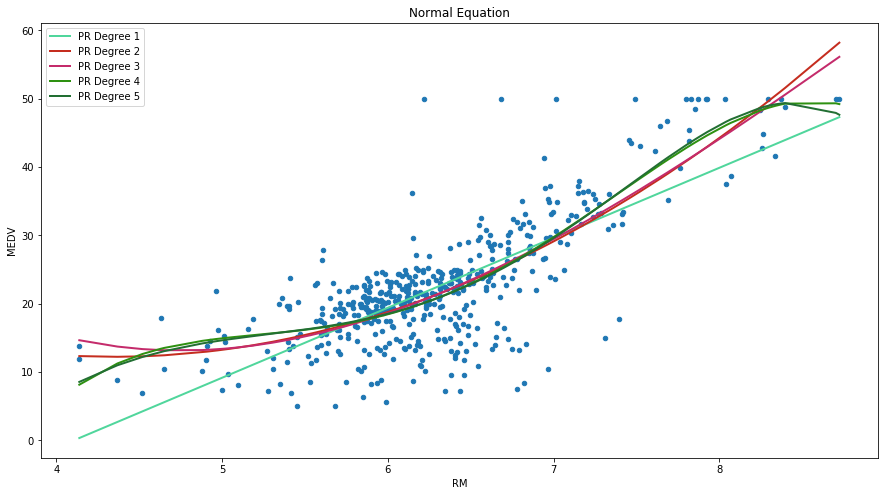

For threshold 5.5
Number of non-outliers samples (Z-score method) : 501
Number of outliers samples (Z-score method) : 5
(5, 3)
(5, 1)


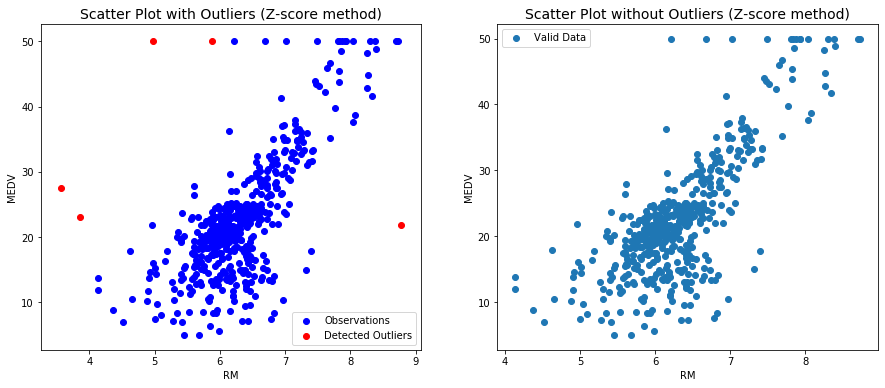

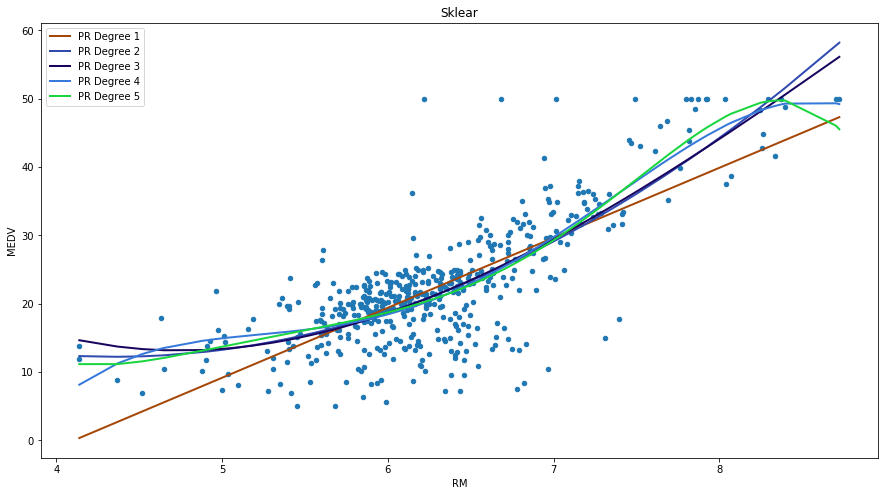

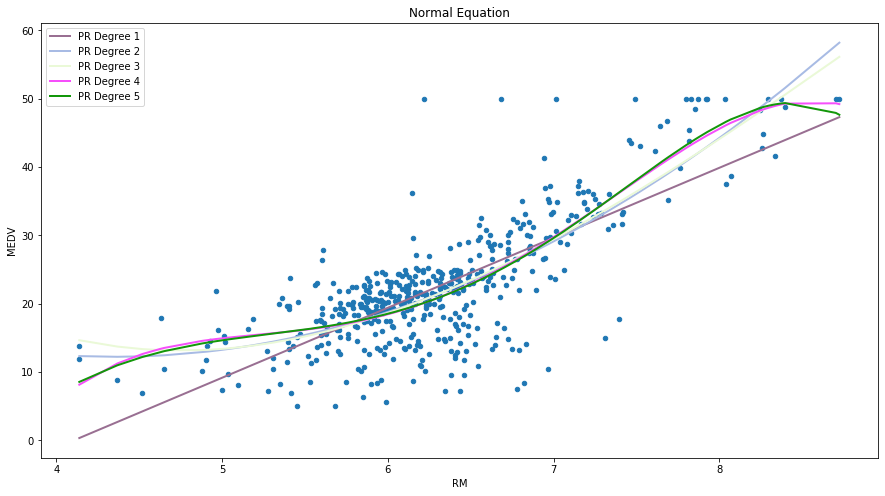

For threshold 6
Number of non-outliers samples (Z-score method) : 503
Number of outliers samples (Z-score method) : 3
(3, 3)
(3, 1)


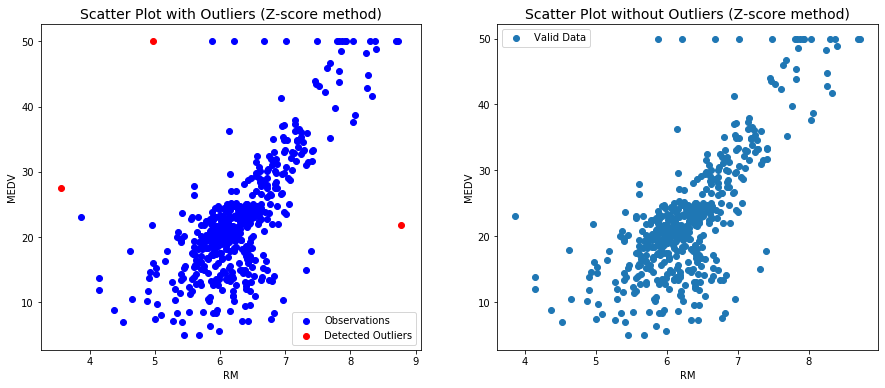

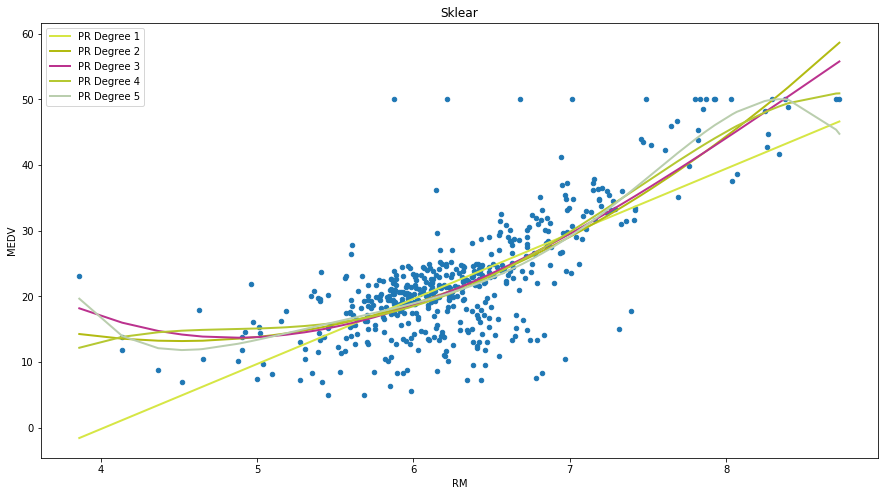

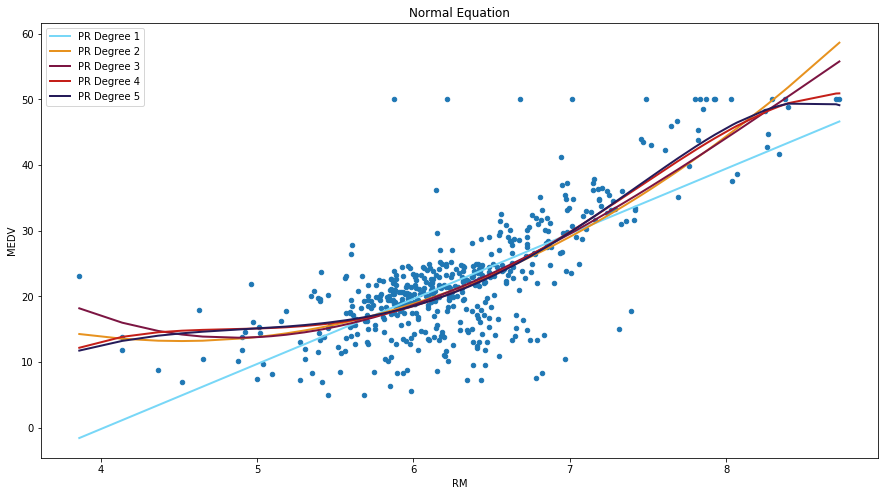

In [58]:
input_feature = 'RM'
output_feature = 'MEDV'

from scipy import stats
threshold = [2.5, 3, 3.5, 5, 5.5, 6]
degree = 5

for i in threshold:
    print("For threshold "+str(i))
    #abs = modulo
    X_inout_wo = df[(np.abs(stats.zscore(df))<i).all(axis=1)]
    print("Number of non-outliers samples (Z-score method) : {}".format(X_inout_wo.shape[0]))
    X_inout_o = df[~(np.abs(stats.zscore(df))<i).all(axis=1)]
    print("Number of outliers samples (Z-score method) : {}".format(X_inout_o.shape[0]))

    y_inout_wo = y[X_inout_wo.index]
    y_inout_o = y[X_inout_o.index]
    
    print(X_inout_o.shape)
    print(y_inout_o.shape)
    
    fig = plt.figure(figsize=(15,6))
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)

    ax1.scatter(X_inout_wo[input_feature], y_inout_wo, label = 'Observations', c='b')
    ax1.scatter(X_inout_o[input_feature], y_inout_o, label='Detected Outliers', c='r')
    ax1.set_xlabel(input_feature)
    ax1.set_ylabel(output_feature)
    ax1.set_title('Scatter Plot with Outliers (Z-score method)', fontsize=14)
    ax1.legend()

    ax2.scatter(X_inout_wo[input_feature], y_inout_wo, label = 'Valid Data')
    ax2.set_xlabel(input_feature)
    ax2.set_ylabel(output_feature)
    ax2.set_title('Scatter Plot without Outliers (Z-score method)', fontsize=14)
    ax2.legend()
    plt.show()

    #Sklear
    plt.figure(figsize = (15,8))
    plt.scatter(X_inout_wo[input_feature], y_inout_wo, s=20)
    for i in range(1,degree+1):
        polynomial_features_2= PolynomialFeatures(degree=i)
        x_poly_2 = polynomial_features_2.fit_transform(X_inout_wo[input_feature].to_numpy().reshape(-1,1))
        model2 = LinearRegression()
        model2.fit(x_poly_2, y_inout_wo)
        y_poly_pred_2 = model2.predict(x_poly_2)
        sort_axis = operator.itemgetter(0)
        sorted_zip = sorted(zip(X_inout_wo[input_feature],y_poly_pred_2), key=sort_axis)
        x2, y_poly_pred_2 = zip(*sorted_zip)
        plt.plot(x2, y_poly_pred_2, color=np.random.rand(3,), label="PR Degree "+str(i), linewidth=2)
        plt.xlabel(input_feature)
        plt.ylabel(output_feature)
        plt.title('Sklear')
        plt.legend(loc="upper left")
    plt.show()
    
    #Normal Equation
    plt.figure(figsize = (15,8))
    plt.scatter(X_inout_wo[input_feature].to_numpy().reshape(-1,1), X_inout_wo[output_feature].to_numpy().reshape(-1,1), s=20)
    
    for i in range(1,degree+1):
        X_poly_2 = np.c_[np.ones((X_inout_wo[input_feature].shape[0], 1)), polynomial_features(X_inout_wo.get([input_feature]).copy(), i)]
        theta_ne_2, eta_ne_2 = normalEquations(X_poly_2, X_inout_wo[output_feature].to_numpy().reshape(-1,1))
        sort_axis = operator.itemgetter(0)
        sorted_zip = sorted(zip(X_inout_wo[input_feature].to_numpy().reshape(-1,1),X_poly_2.dot(theta_ne_2)), key=sort_axis)
        x2, y_poly_pred_2 = zip(*sorted_zip)
        plt.plot(x2, y_poly_pred_2, color=np.random.rand(3,), label="PR Degree "+str(i), linewidth=2)
        plt.xlabel(input_feature)
        plt.ylabel(output_feature)
        plt.title('Normal Equation')
        plt.legend(loc="upper left")
    plt.show()
   

### +Distribuzione chi quadrato
E' la distribuzione di probabilità della somma dei quadrati di variabili aleatorie normali indipendenti. Ora rimuoviamo la variabile target e calcoliamo la distanza di Mahalanobis per ogni istanza. Supponendo che la statistica del test segua la distribuzione del chi quadro, possiamo iniziare con una soglia pari al valore critico a 2 gradi di libertà e livello di significatività del 5% (Tali parametri sono usati come punto di partenza, poi devono essere variati per trovare la migliore soluzione possibile).

![title](data/Distribuzione-chi-quadrato.png)

In [59]:
from scipy.stats import chi2
threshold = chi2.ppf((1-0.075),df=7)
#threshold = chi2.ppf((1-0.01),df=7)
print(threshold)
df.MAHALA[df[~(df > threshold)].isnull()['MAHALA'] == True]
#print(df)

12.88343194914333


364    25.089208
365    35.296716
367    23.579867
368    39.094414
369    13.332321
371    18.073439
372    22.616005
Name: MAHALA, dtype: float64

In [60]:
#Eseguo il conteggio degli outliers e dei non outliers
boston_iqr = df[~((df > threshold))['MAHALA'] == True]
print("Number MAHALA of non-outliers samples (IQR method) : {}".format(boston_iqr.shape[0]))

outliers_iqr = df[((df > threshold))['MAHALA'] == True]
print("Number MAHALA outliers samples (IQR method) : {}".format(outliers_iqr.shape[0]))

Number MAHALA of non-outliers samples (IQR method) : 499
Number MAHALA outliers samples (IQR method) : 7


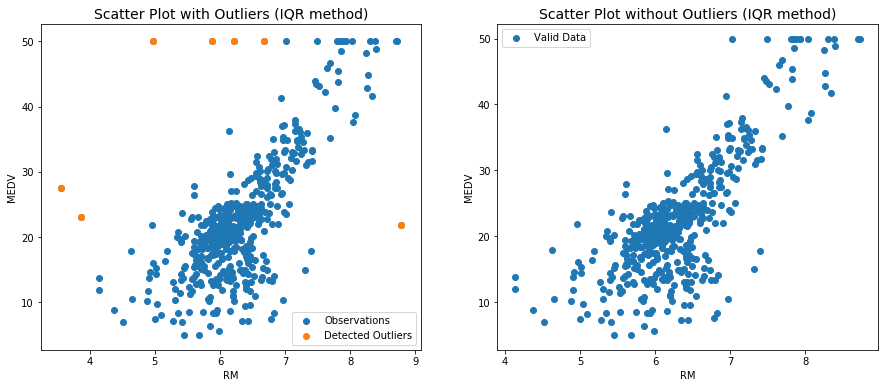

In [61]:
fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

input_feature = 'RM'
output_feature = 'MEDV'

ax1.scatter(df[input_feature], df[output_feature], label = 'Observations')
ax1.scatter(outliers_iqr[input_feature], outliers_iqr[output_feature], label='Detected Outliers')
ax1.set_xlabel(input_feature)
ax1.set_ylabel(output_feature)
ax1.set_title('Scatter Plot with Outliers (IQR method)', fontsize=14)
ax1.legend()

ax2.scatter(boston_iqr[input_feature], boston_iqr[output_feature], label = 'Valid Data')
ax2.set_xlabel(input_feature)
ax2.set_ylabel(output_feature)
ax2.set_title('Scatter Plot without Outliers (IQR method)', fontsize=14)
ax2.legend()

plt.show()

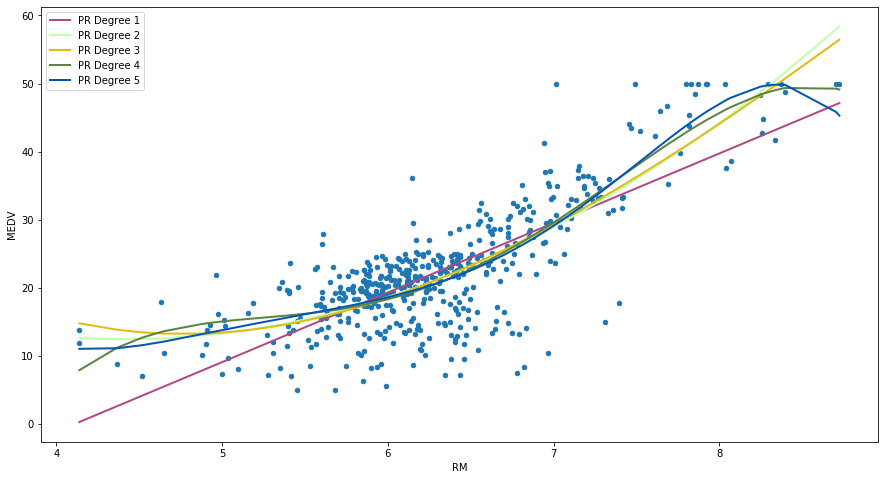

In [62]:
clearedDf = df.drop(outliers_iqr.index)

degree = 5

plt.figure(figsize = (15,8))
plt.scatter(clearedDf[input_feature].to_numpy().reshape(-1,1), clearedDf[output_feature].to_numpy().reshape(-1,1), s=20)

for i in range(1,degree+1):
    polynomial_features_2= PolynomialFeatures(degree=i)
    x_poly_2 = polynomial_features_2.fit_transform(clearedDf[input_feature].to_numpy().reshape(-1,1))
    model2 = LinearRegression()
    model2.fit(x_poly_2, clearedDf[output_feature].to_numpy().reshape(-1,1))
    y_poly_pred_2 = model2.predict(x_poly_2)
    sort_axis = operator.itemgetter(0)
    sorted_zip = sorted(zip(clearedDf[input_feature].to_numpy().reshape(-1,1),y_poly_pred_2), key=sort_axis)
    x2, y_poly_pred_2 = zip(*sorted_zip)
    plt.plot(x2, y_poly_pred_2, color=np.random.rand(3,), label="PR Degree "+str(i), linewidth=2)
    plt.xlabel(input_feature)
    plt.ylabel(output_feature)
    plt.legend(loc="upper left")
plt.show()